<a href="https://colab.research.google.com/github/GPINTOC/Proyecto-2-Coding-Dojo/blob/main/Proyecto2_Parte5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix, classification_report, RocCurveDisplay, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
filename = '/content/drive/MyDrive/Documentos CodingDojo/data-ori.csv'
df = pd.read_csv(filename)
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


Name / Data Type / Value Sample/ Description
----------------------------- 
- HAEMATOCRIT /Continuous /35.1 / Patient laboratory test result of haematocrit
- HAEMOGLOBINS/Continuous/11.8 / Patient laboratory test result of haemoglobins
- ERYTHROCYTE/Continuous/4.65 /  Patient laboratory test result of erythrocyte
- LEUCOCYTE	/Continuous /6.3 / Patient laboratory test result of leucocyte
- THROMBOCYTE/Continuous/310/ Patient laboratory test result of thrombocyte
- MCH/Continuous /25.4/ Patient laboratory test result of MCH
- MCHC/Continuous/33.6/ Patient laboratory test result of MCHC
- MCV/Continuous /75.5/ Patient laboratory test result of MCV
- AGE/Continuous/12/ Patient age
- SEX/Nominal – Binary/F/ Patient gender
- SOURCE/Nominal/ {in,out}/The class target in.= in care patient, out = out care patient


# **PREPROCESAMIENTO DE DATOS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [5]:
# Creo una copia del dataset para poder trabajar la limpieza y preprocesamiento en ella
df1 = df.copy()
df1
df1.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


In [ ]:
# No hay datos duplicados
df1.duplicated().sum()

0

In [ ]:
# No hay datos nulos o Nan
df1.isna().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [ ]:
# Reviso si hay valores incoherentes 
df1.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


En este caso, no existe ningún valor aberrante, ya que todos son relativos a pacientes sanos o no sanos, pero dentro de criterios médicos de valores existentes, tanto dentro como fuera de los rangos de referencia. Hay que tomar en cuenta que la edad es relevante en este modelo ya que debería tener directa relación con las variables.

In [ ]:
# Data objetivo levemente desbalanceada
print(df1['SOURCE'].value_counts())
print(df1['SOURCE'].value_counts(normalize = True))

out    2628
in     1784
Name: SOURCE, dtype: int64
out    0.595648
in     0.404352
Name: SOURCE, dtype: float64


In [ ]:
# Reviso si solo existen 2 categorías de sexo en el dataset
df1['SEX'].value_counts()

M    2290
F    2122
Name: SEX, dtype: int64

In [ ]:
# Reemplazo mi columna objetivo por 0 para out(ambulatorio) y 1 para in(hospitalizado)
df1['SOURCE'] = df1['SOURCE'].replace({'out':0, 'in':1})
df1.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,0


**Eliminación de columnas poco relevantes**

Todos los datos corresponden a valores de hemograma que pueden ser predictivos de la gravedad de una persona, por lo que considero que todas las columnas son importantes y no eliminaré ninguna.

In [ ]:
# Al filtrar por valor 21, en donde un paciente ya podría necesitar una transfusión de sangre, no hay relación exacta con source
hematocrito_anormal = df1[df1['HAEMATOCRIT'] <= 21]
hematocrito_anormal

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
515,16.7,4.6,3.09,5.1,306,14.9,27.5,54.0,20,M,1
912,14.6,3.8,2.31,5.2,403,16.5,26.0,63.2,26,F,0
1076,21.0,6.7,2.15,5.9,185,31.2,31.9,97.7,29,M,1
2332,17.7,6.2,2.02,18.1,527,30.7,35.0,87.6,50,M,0
2514,19.8,6.7,2.98,21.6,168,22.5,33.8,66.4,53,M,0
2851,18.8,5.8,1.93,9.9,261,30.1,30.9,97.4,58,F,0
3413,19.6,6.4,2.38,30.6,211,26.9,32.7,82.4,66,F,1
3589,18.6,6.1,2.25,8.6,22,27.1,32.8,82.7,68,M,1
3592,13.7,4.4,1.48,5.3,263,29.7,32.1,92.6,68,F,0
3736,20.7,6.4,1.98,52.8,388,32.3,30.9,104.5,70,F,0


In [ ]:
# En este caso, se puede ver que la gran mayoría de los pacientes con plaquetas bajas (clasificadas como valor crítico) son tratados como hospitalizados
# De alguna forma, los casos con recuentos más bajos como 8, el paciente es tratado como ambulatorio, posiblemente porque presente una patología de base como una leucemia o HPN
plaqueta_anormal = df1[df1['THROMBOCYTE'] <= 20]
plaqueta_anormal

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
538,43.3,15.0,5.14,5.3,19,29.2,34.6,84.2,21,M,1
816,50.5,16.4,7.05,3.9,15,23.3,32.5,71.6,25,M,1
817,49.7,16.1,6.95,3.6,15,23.2,32.4,71.5,25,M,1
818,49.7,16.0,6.91,5.5,12,23.2,32.2,71.9,25,M,1
820,53.2,17.0,7.35,6.1,12,23.1,32.0,72.4,25,M,1
821,48.4,15.5,6.79,6.7,18,22.8,32.0,71.3,25,M,1
1259,43.8,15.0,5.03,12.2,20,29.8,34.2,87.1,32,M,1
1260,44.3,15.1,5.11,14.3,20,29.5,34.1,86.7,32,M,1
2023,45.0,15.7,5.47,3.4,19,28.7,34.9,82.3,45,M,1
2025,44.4,15.6,5.43,4.6,15,28.7,35.1,81.8,45,M,1


In [ ]:
# En cuanto a los valores críticos de leucocitos, se puede apreciar que hay una distribución pareja en la salida Source de 0 y 1
leucocito_anormal = df1[df1['LEUCOCYTE'] <= 3.0]
leucocito_anormal

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
9,35.4,11.4,4.80,2.6,183,23.8,32.2,73.8,1,F,0
26,32.5,10.6,4.19,1.6,111,25.3,32.6,77.6,1,F,1
28,36.8,11.9,4.69,1.9,108,25.4,32.3,78.5,1,F,1
52,44.8,15.0,5.81,2.9,125,25.8,33.5,77.1,2,M,1
58,37.9,12.7,4.82,2.9,182,26.3,33.5,78.6,2,M,0
...,...,...,...,...,...,...,...,...,...,...,...
4103,34.5,12.0,3.55,3.0,92,33.8,34.8,97.2,77,M,0
4105,38.5,13.7,4.32,2.4,218,31.7,35.6,89.1,77,M,1
4107,40.2,13.2,4.83,1.7,142,27.3,32.8,83.2,77,F,1
4136,40.1,13.6,3.84,2.8,117,35.4,33.9,104.4,78,M,0


# **EXPLORACIÓN DE DATOS**

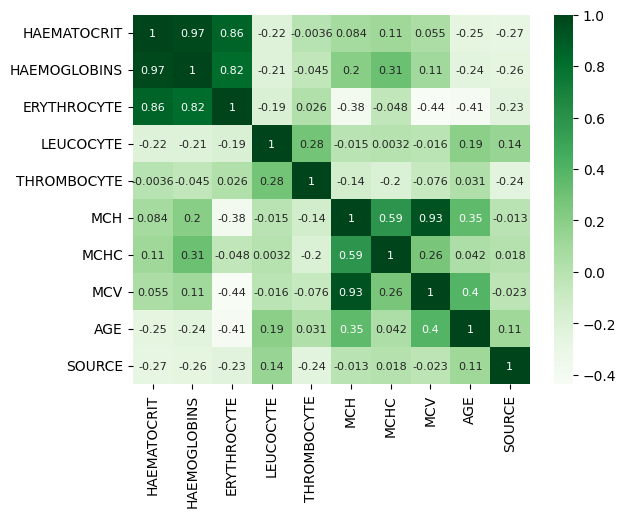

In [ ]:
# GRÁFICO DE CORRELACIÓN
import seaborn as sns
corr = df1.corr(numeric_only = True)
sns.heatmap(corr, cmap = 'Greens', annot = True, annot_kws = {'size': 8});
sns.set(rc = {'figure.figsize':(30, 8)});

En este mapa de calor, se puede apreciar que existen 

*Correlaciones fuertes:*

1.   Hemoglobina y hematocrito
2.   Hemoglobina y eritrocitos
3.   Hematocrito y eritrocitos
4.   MCV y MCH

*Correlaciones moderadas:*
1.   MCHC y MCH

*Correlaciones débiles:*
1.   Age y MCV 

Es interesante recalcar que la variable objetivo no tiene correlación con ninguna variable.

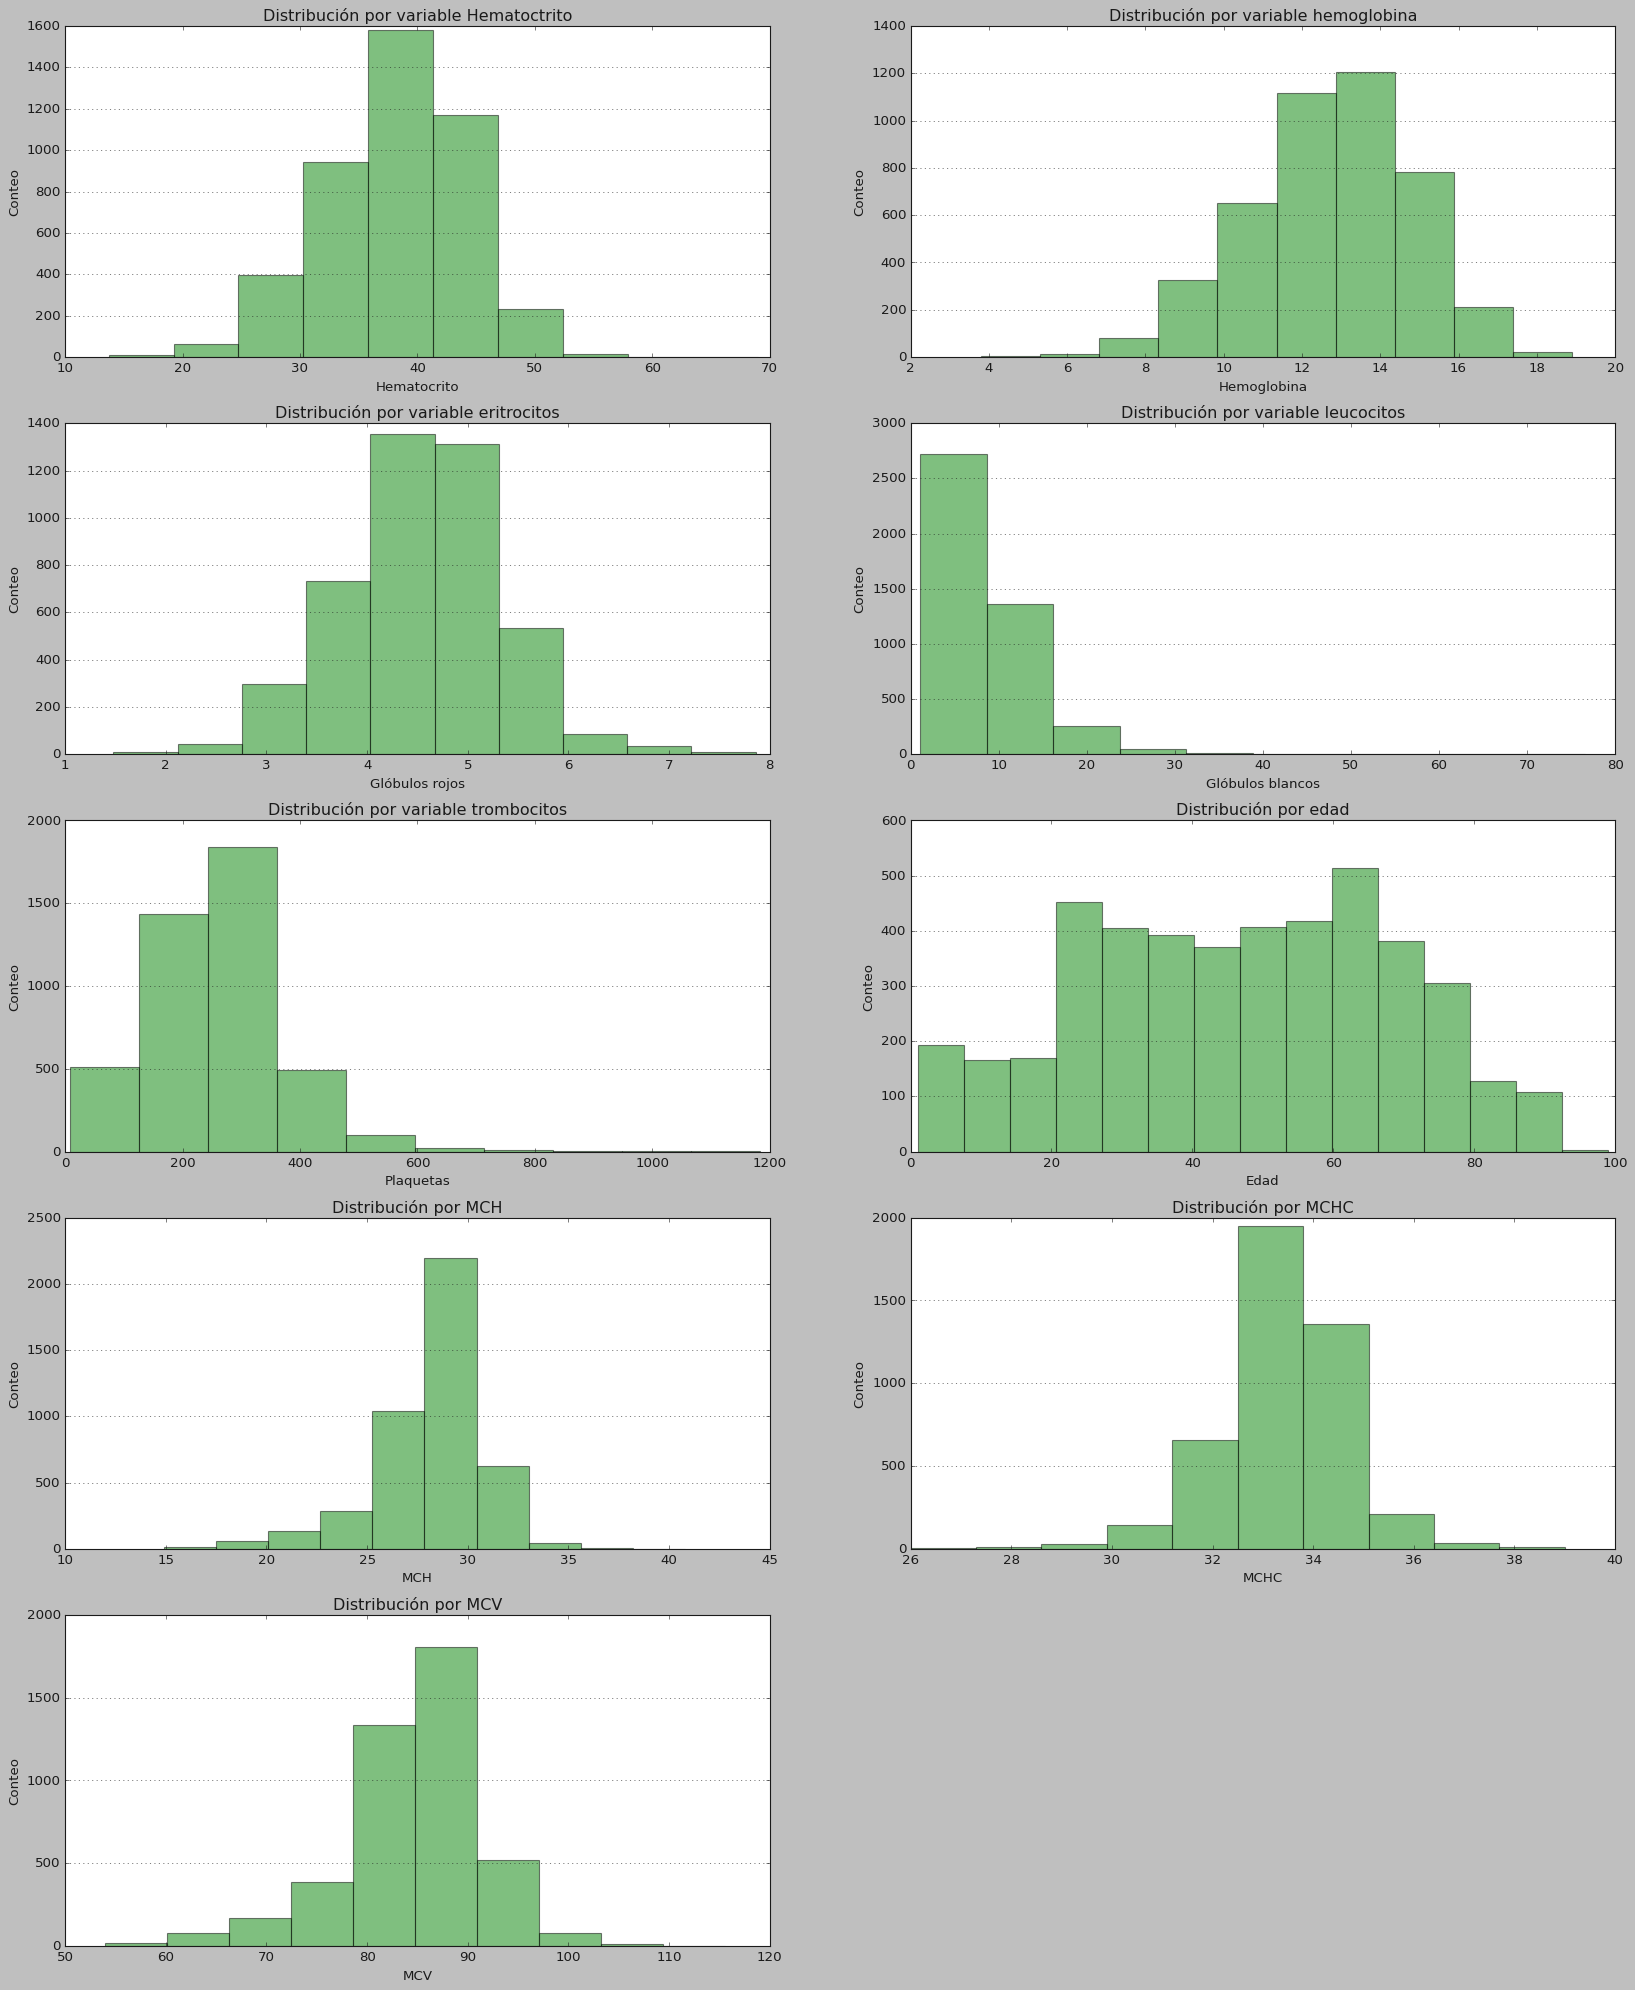

In [ ]:
# HISTOGRAMAS CON SUBPLOT

import matplotlib.pyplot as plt
plt.figure(figsize=(25,30))
plt.subplot(5, 2, 1)
df1['HAEMATOCRIT'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable Hematoctrito')
plt.ylabel('Conteo')
plt.xlabel('Hematocrito')

plt.subplot(5, 2, 2)
df1['HAEMOGLOBINS'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable hemoglobina')
plt.ylabel('Conteo')
plt.xlabel('Hemoglobina')

plt.subplot(5, 2, 3)
df1['ERYTHROCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable eritrocitos')
plt.ylabel('Conteo')
plt.xlabel('Glóbulos rojos')

plt.subplot(5, 2, 4)
df1['LEUCOCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'green', bins = 10);
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable leucocitos')
plt.ylabel('Conteo')
plt.xlabel('Glóbulos blancos')

plt.subplot(5, 2, 5)
df1['THROMBOCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'green', bins = 10);
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable trombocitos')
plt.ylabel('Conteo')
plt.xlabel('Plaquetas')

plt.subplot(5, 2, 6)
df1['AGE'].hist(edgecolor = 'black', alpha = 0.5, color = 'green', bins = 15);
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por edad')
plt.ylabel('Conteo')
plt.xlabel('Edad')
plt.show;

plt.subplot(5, 2, 7)
df1['MCH'].hist(edgecolor = 'black', alpha = 0.5, color = 'green', bins = 10);
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por MCH')
plt.ylabel('Conteo')
plt.xlabel('MCH')
plt.show;

plt.subplot(5, 2, 8)
df1['MCHC'].hist(edgecolor = 'black', alpha = 0.5, color = 'green', bins = 10);
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por MCHC')
plt.ylabel('Conteo')
plt.xlabel('MCHC')
plt.show;

plt.subplot(5, 2, 9)
df1['MCV'].hist(edgecolor = 'black', alpha = 0.5, color = 'green', bins = 10);
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por MCV')
plt.ylabel('Conteo')
plt.xlabel('MCV')
plt.show;

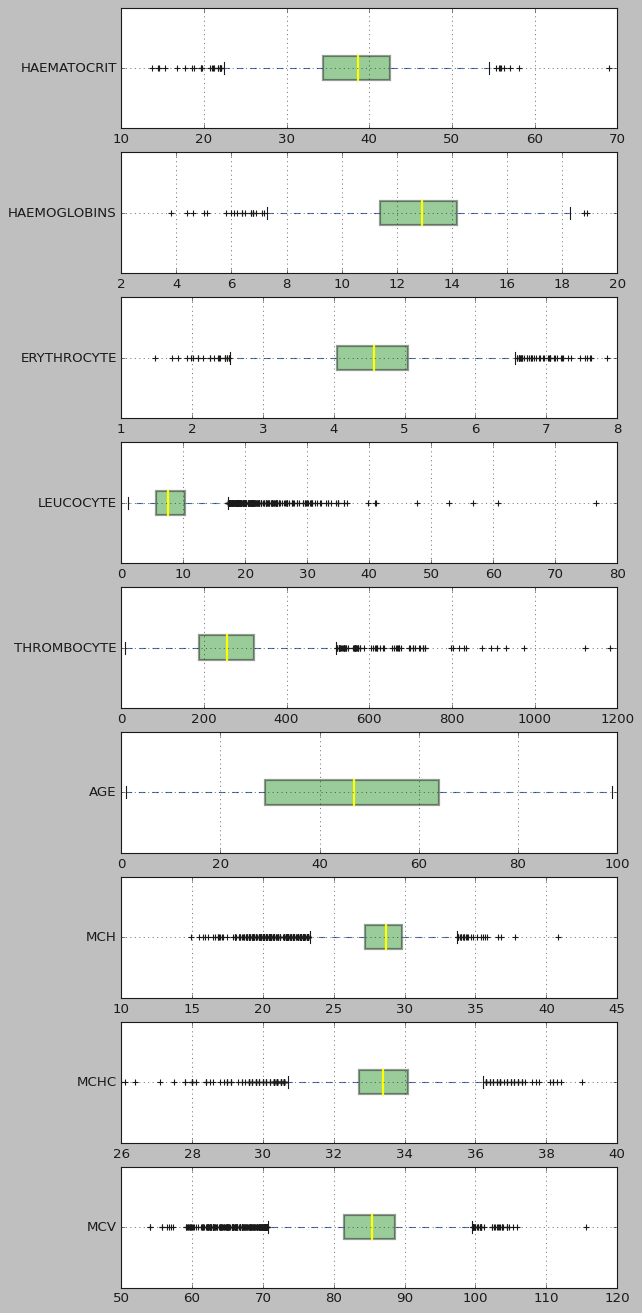

In [ ]:
# BOXPLOTS, FORMA 1 DE REPRESENTAR SUBLPLOTS
# Hay varios outliers, sin embargo, tienen relación con los datos del histograma por lo que no considero que eliminarlos sea la mejor opción
fig, axes = plt.subplots(9, 1, figsize=(8, 20))
for x, c in enumerate(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'AGE', 'MCH', 'MCHC', 'MCV']):
    f = df1[[c]].boxplot(ax=axes[x], vert=False, widths = 0.2, patch_artist=True, 
                         medianprops = dict(linestyle='-', linewidth=2, color='Yellow'), 
                         boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'green', alpha = 0.4))

Estos gráficos representan visualizaciones como histogramas y boxplots.

Para el caso específico de este dataset, los valores outliers no se deben eliminar ya que muchos de ellos podrían potencialmente representar a pacientes en estados patológicos que pudiesen ser hospitalizados por compromiso en su salud. Estos puntos que se muestran en los boxplots, se visualizan también en la distribución de los histogramas hacia los costados del gráfico.

In [6]:
# Fuente https://www.kaggle.com/code/ozgurbayram00/diabetes-eda-prediction-a-complete-ml-guide
def suma_variables(df1, num_var):
  fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("Quantiles", "Distribution"))
  fig.add_trace(go.Box(y = df1[num_var], name = str(num_var), showlegend = False, marker_color = "#A6D0DD"), row = 1, col = 1)
  fig.add_trace(go.Histogram(x = df1[num_var], xbins = dict(start = df[num_var].min(), end = df[num_var].max()), showlegend = False, name = str(num_var), marker=dict(color="#0A4D68", line = dict(color = '#DBE6EC', width = 1))), row = 1, col = 2)
  fig.update_layout(title={'text': num_var.capitalize(),'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, template='plotly') 
  iplot(fig)

# Esta forma de representación es para ver el histograma y subplot en conjunto de las variables, de esta forma se puede ver la distribución de los outliers
for i in df1:
  suma_variables(df1, i)

Con este código, se puede demostrar de forma interactiva los valores de los cuartiles, medianas y outliers para compararlos con el histograma. 

Puedes ver el codigo descargando el archivo, ya que Github no permite mostrar la herramienta, te invito a visualizarlo.

In [ ]:
# Hago un nuevo df solo con pacientes hospitalizados (in: 1) 
df1_hospitalizados= df1[df1['SOURCE'] == 1]
df1_hospitalizados

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
11,54.0,16.6,7.61,10.0,88,21.8,30.7,71.0,1,F,1
12,31.7,10.4,4.91,9.7,348,21.2,32.8,64.6,1,M,1
23,53.0,16.3,7.54,4.3,112,21.6,30.8,70.3,1,F,1
24,34.6,11.2,4.42,7.0,152,25.3,32.4,78.3,1,F,1
25,34.7,11.5,4.50,5.1,135,25.6,33.1,77.1,1,F,1
...,...,...,...,...,...,...,...,...,...,...,...
4405,28.3,9.2,3.03,8.4,100,30.4,32.5,93.4,92,F,1
4406,33.7,10.4,3.48,11.4,112,29.9,30.9,96.8,92,F,1
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,1
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,1


In [ ]:
# Hago un nuevo df solo con pacientes ambulatorios (out: 0) 
df1_ambulatorio = df1[df1['SOURCE'] == 0]
df1_ambulatorio

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,0
...,...,...,...,...,...,...,...,...,...,...,...
4400,23.2,7.7,2.55,10.2,134,30.2,33.2,91.0,92,F,0
4401,30.6,10.2,3.44,9.6,121,29.7,33.3,89.0,92,F,0
4402,29.1,9.5,3.24,8.9,116,29.3,32.6,89.8,92,F,0
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,0


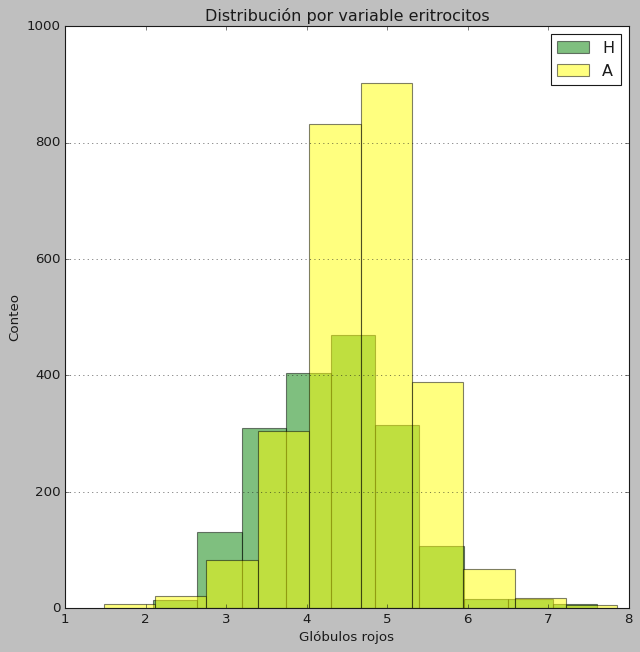

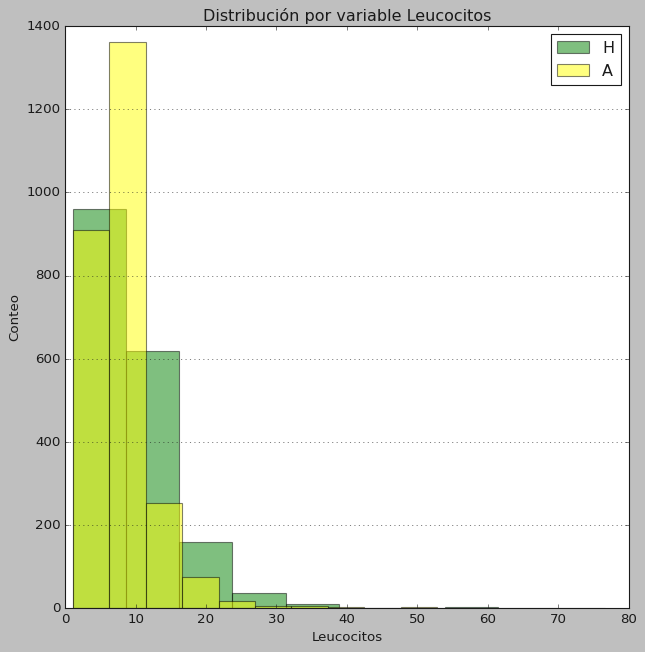

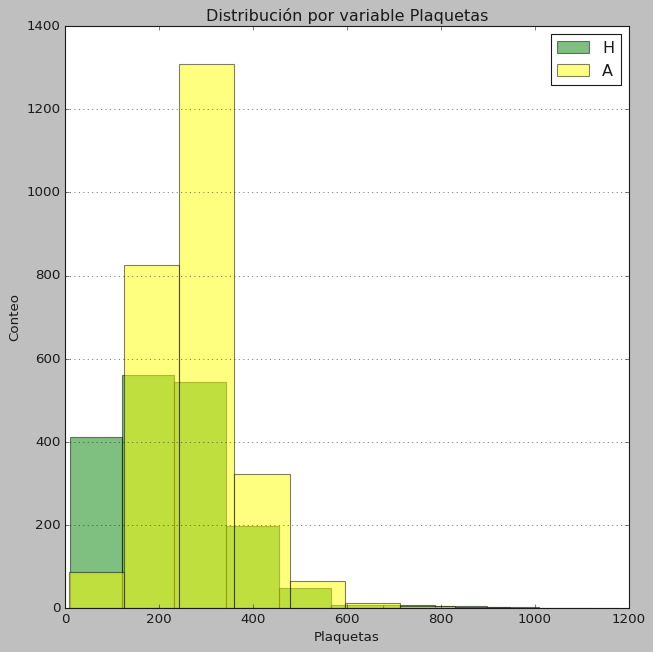

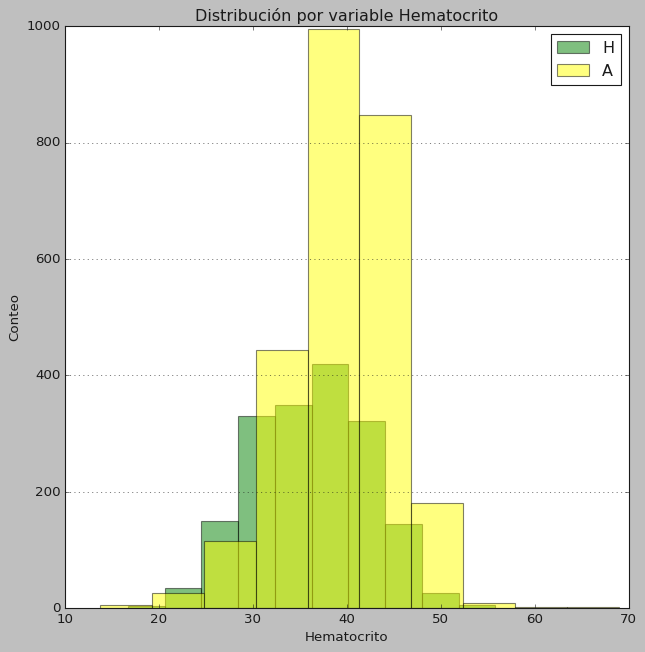

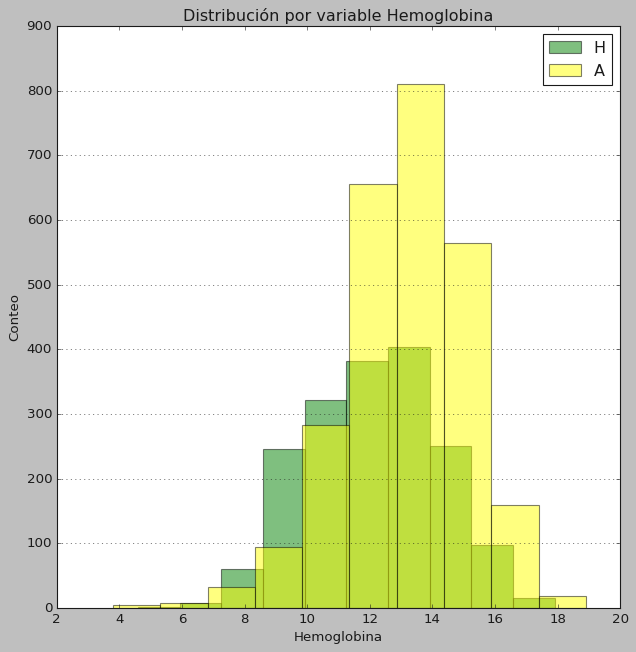

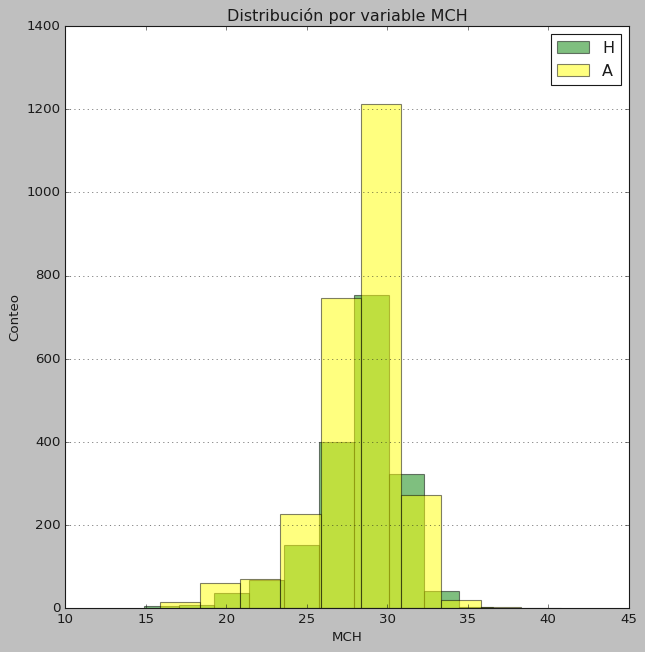

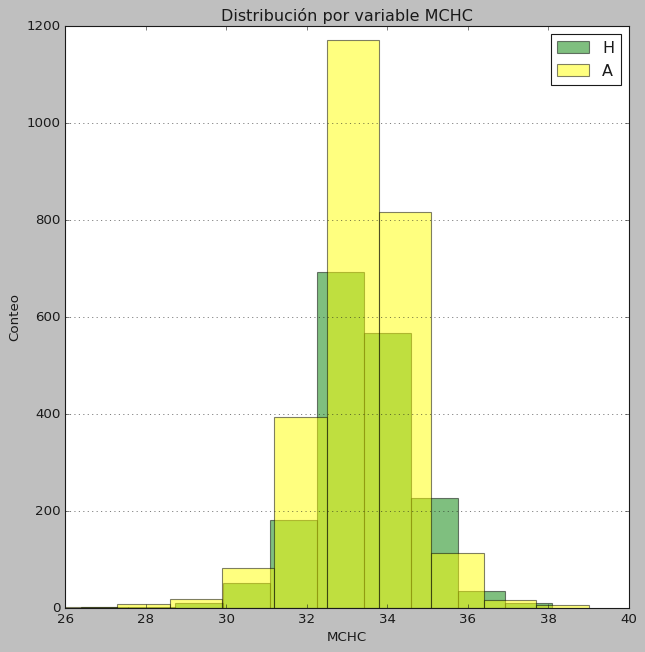

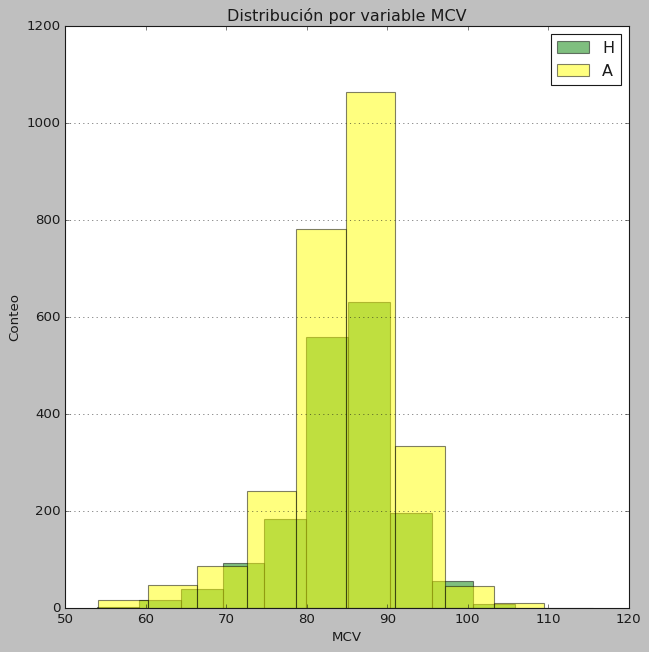

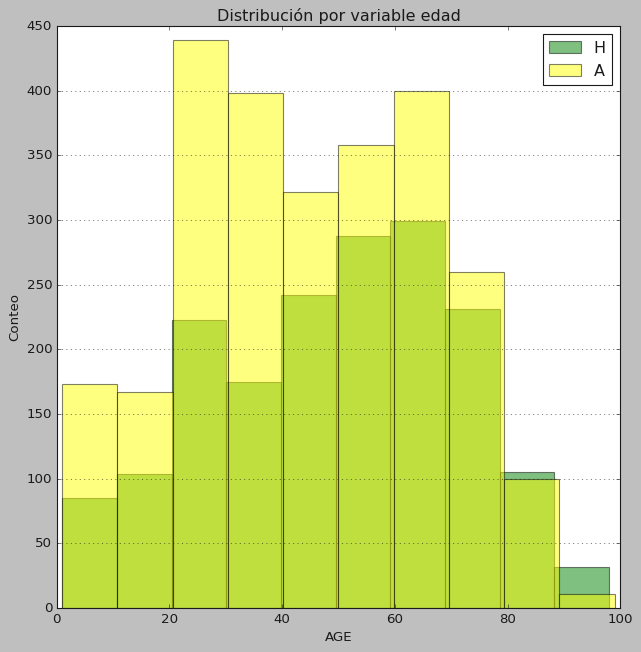

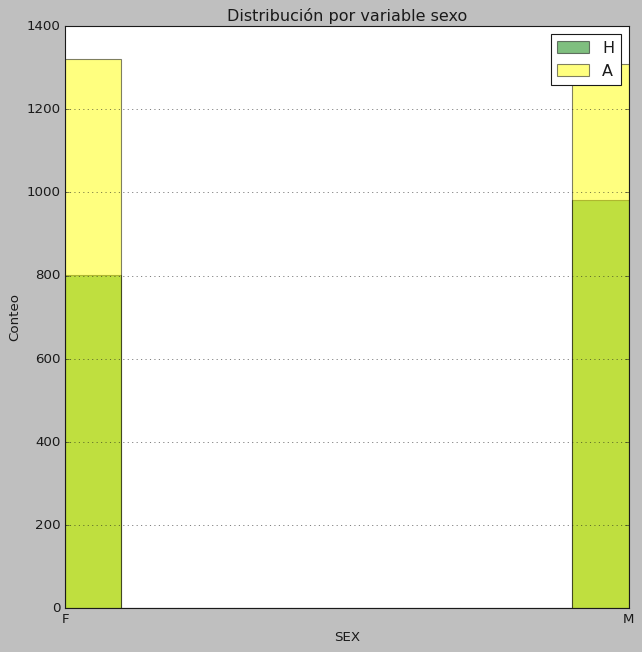

In [ ]:
# Junto los df en el histograma, para que se superpongan y se puedan hace comparaciones con los dos grupos de pacientes que separé anteriormente.
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
df1_hospitalizados['ERYTHROCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable eritrocitos')
plt.ylabel('Conteo')
plt.xlabel('Hematocrito')
plt.legend('HA')

df1_ambulatorio['ERYTHROCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'yellow');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable eritrocitos')
plt.ylabel('Conteo')
plt.xlabel('Glóbulos rojos')
plt.legend('HA')

# Junto los df en el histograma
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
df1_hospitalizados['LEUCOCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable Leucocitos')
plt.ylabel('Conteo')
plt.xlabel('Leucocitos')
plt.legend('HA')

df1_ambulatorio['LEUCOCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'yellow');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable Leucocitos')
plt.ylabel('Conteo')
plt.xlabel('Leucocitos')
plt.legend('HA')

# Junto los df en el histograma
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
df1_hospitalizados['THROMBOCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable Plaquetas')
plt.ylabel('Conteo')
plt.xlabel('Plaquetas')
plt.legend('HA')

df1_ambulatorio['THROMBOCYTE'].hist(edgecolor = 'black', alpha = 0.5, color = 'yellow');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable Plaquetas')
plt.ylabel('Conteo')
plt.xlabel('Plaquetas')
plt.legend('HA')

# Junto los df en el histograma
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
df1_hospitalizados['HAEMATOCRIT'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable Hematocrito')
plt.ylabel('Conteo')
plt.xlabel('Hematocrito')
plt.legend('HA')

df1_ambulatorio['HAEMATOCRIT'].hist(edgecolor = 'black', alpha = 0.5, color = 'yellow');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable Hematocrito')
plt.ylabel('Conteo')
plt.xlabel('Hematocrito')
plt.legend('HA')

# Junto los df en el histograma
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
df1_hospitalizados['HAEMOGLOBINS'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable Hemoglobina')
plt.ylabel('Conteo')
plt.xlabel('Hemoglobina')
plt.legend('HA')

df1_ambulatorio['HAEMOGLOBINS'].hist(edgecolor = 'black', alpha = 0.5, color = 'yellow');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable Hemoglobina')
plt.ylabel('Conteo')
plt.xlabel('Hemoglobina')
plt.legend('HA')

# Junto los df en el histograma
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
df1_hospitalizados['MCH'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable MCH')
plt.ylabel('Conteo')
plt.xlabel('MCH')
plt.legend('HA')

df1_ambulatorio['MCH'].hist(edgecolor = 'black', alpha = 0.5, color = 'yellow');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable MCH')
plt.ylabel('Conteo')
plt.xlabel('MCH')
plt.legend('HA')

# Junto los df en el histograma
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
df1_hospitalizados['MCHC'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable MCHC')
plt.ylabel('Conteo')
plt.xlabel('MCHC')
plt.legend('HA')

df1_ambulatorio['MCHC'].hist(edgecolor = 'black', alpha = 0.5, color = 'yellow');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable MCHC')
plt.ylabel('Conteo')
plt.xlabel('MCHC')
plt.legend('HA')

# Junto los df en el histograma
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
df1_hospitalizados['MCV'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable MCV')
plt.ylabel('Conteo')
plt.xlabel('MCV')
plt.legend('HA')

df1_ambulatorio['MCV'].hist(edgecolor = 'black', alpha = 0.5, color = 'yellow');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable MCV')
plt.ylabel('Conteo')
plt.xlabel('MCV')
plt.legend('HA')

# Junto los df en el histograma
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
df1_hospitalizados['AGE'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable edad')
plt.ylabel('Conteo')
plt.xlabel('AGE')
plt.legend('HA')

df1_ambulatorio['AGE'].hist(edgecolor = 'black', alpha = 0.5, color = 'yellow');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable edad')
plt.ylabel('Conteo')
plt.xlabel('AGE')
plt.legend('HA')

# Junto los df en el histograma
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
df1_hospitalizados['SEX'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable sexo')
plt.ylabel('Conteo')
plt.xlabel('SEX')
plt.legend('HA')

df1_ambulatorio['SEX'].hist(edgecolor = 'black', alpha = 0.5, color = 'yellow');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por variable sexo')
plt.ylabel('Conteo')
plt.xlabel('SEX')
plt.legend('HA');

- Eritrocitos: Los pacientes ambulatorios se presentan en mayor cantidad que los hospitalizados y se distribuyen mayormente en los rangos normales para esta variable.

- Leucocitos: Los pacientes con recuentos mayores a 10000 de leucocitos se hospitalizan más frecuentemente que los clasificados como ambulatorios.

- Plaquetas: Los pacientes con recuentos bajos de plaquetas (entre 0 a 100000 aproximadamente se hospitalizan más frecuentemente que los clasificados como ambulatorios)

- Hematocrito y hemoglobina: Los pacientes con recuento más bajos de hematocrito y hemoglobina quedan hospitalizados. 

- MCH, MCHC, MCV: en estos casos, la distribución de hospitalización es difusa y no presenta alguna característica propia que diferencia a ambulatorios y hospitalizados. 

- Edad: en estos casos, la mayoría de los pacientes sobre 90 años quedan hospitalizados

- Sexo: no presenta diferencia entre sexo ser hospitalizado o ambulatorio.

En la gran mayoría de los casos, predominan los pacientes clasificados como ambulatorios en lo rangos de referencia normal para las variables estudiadas. 

# **MODELOS DE CLASIFICACIÓN**

In [ ]:
# Vuelvo a trabajar con el df original
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [ ]:
# Convertir los nombres de cadenas de las clases para valores numéricos.
df['SOURCE'] = df['SOURCE'].replace({'out': 0, 'in': 1})

In [ ]:
# Ordeno los datos en matriz de características y vector objetivo
# Realizo un train test split. Lo realizo 75 y 25 por defecto, ya que el objetivo está bastante balanceado.
y = df['SOURCE']
X = df.drop(columns = 'SOURCE')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Instanciar selectores de columnas
num_selector = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV']
cat_selector = ['SEX']
ord_selector = ['AGE']

In [ ]:
# Escalo datos numéricos porque todos están en diferentes unidades de medida y hago one hot encoder para la columna sex clasificada como M y F
scaler = StandardScaler() 
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Hago el pipeline
numeric_pipe = make_pipeline(scaler) 
categorical_pipe = make_pipeline(ohe) 
# Realizo tuplas
number_tuple = (numeric_pipe, num_selector) 
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE',
                                  'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC',
                                  'MCV']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['SEX'])])

In [ ]:
# Estimo el parámetro
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE',
                                  'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC',
                                  'MCV']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['SEX'])])

In [ ]:
# Transformo 
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Visualizo las columnas
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.columns=preprocessor.get_feature_names_out()
X_train_df.head()

,pipeline-1__HAEMATOCRIT,pipeline-1__HAEMOGLOBINS,pipeline-1__ERYTHROCYTE,pipeline-1__LEUCOCYTE,pipeline-1__THROMBOCYTE,pipeline-1__MCH,pipeline-1__MCHC,pipeline-1__MCV,pipeline-2__SEX_F,pipeline-2__SEX_M,remainder__AGE
0,0.291646,0.305621,0.267056,-0.032418,0.464202,-0.025371,0.125611,-0.073338,0.0,1.0,61.0
1,0.424955,0.687984,1.061243,-0.582121,-1.792840,-0.699088,1.193476,-1.269217,0.0,1.0,14.0
2,-0.041626,-0.315718,0.779435,-0.130579,0.516488,-1.784522,-1.270828,-1.590063,0.0,1.0,51.0
3,-0.174935,0.018849,-0.117229,-0.601753,0.359628,0.199201,0.864902,-0.160842,0.0,1.0,31.0
4,0.624919,0.831370,0.612912,-0.464327,0.246340,0.236630,0.947045,-0.146258,0.0,1.0,31.0


# **PRIMER MODELO**
## *ÁRBOL DE DECISION PARÁMETROS POR DEFECTO*

In [ ]:
dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [ ]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print('Train score', train_score)
print('Test score', test_score)

Train score 1.0
Test score 0.6835902085222122


In [ ]:
# Metricas del modelo por defecto
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       650
           1       0.61      0.62      0.62       453

    accuracy                           0.68      1103
   macro avg       0.67      0.67      0.67      1103
weighted avg       0.68      0.68      0.68      1103



## *ÁRBOL DE DECISIÓN HIPERPARÁMETROS AJUSTADOS*

In [ ]:
# Busco los mejores parametros con grid search
param_grid = [{'max_depth':[1,2,3,4,5,6,7,8,9,10,50,100]}]
dectree_reg = DecisionTreeClassifier()
grid_search = GridSearchCV(dectree_reg, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_processed, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50,
                                        100]}],
             return_train_score=True)

In [ ]:
cvres = grid_search.cv_results_
for values in zip(cvres['mean_test_score'], cvres['params']):
  print(values) 

(0.6851039091824591, {'max_depth': 1})
(0.7156275748420764, {'max_depth': 2})
(0.7210656413073332, {'max_depth': 3})
(0.7156211663462418, {'max_depth': 4})
(0.7298352101071135, {'max_depth': 5})
(0.7265009612743751, {'max_depth': 6})
(0.7147193994323903, {'max_depth': 7})
(0.7095761237755196, {'max_depth': 8})
(0.7044392566144831, {'max_depth': 9})
(0.6935612926851598, {'max_depth': 10})
(0.6515526869907534, {'max_depth': 50})
(0.6588153437700265, {'max_depth': 100})


In [ ]:
# Ejecuto el modelo con nuestro valor optimizado para max_depth que segun el grafico es 5
decision_tree_5 = DecisionTreeClassifier(max_depth = 5, random_state = 42)
decision_tree_5.fit(X_train_processed, y_train)
train_5_score = decision_tree_5.score(X_train_processed, y_train)
test_5_score = decision_tree_5.score(X_test_processed, y_test)
print('train_5_score', train_5_score)
print('test_5_score', test_5_score)

train_5_score 0.7645814445451798
test_5_score 0.729827742520399


In [ ]:
train_predsdt = decision_tree_5.predict(X_train_processed)
test_predsdt = decision_tree_5.predict(X_test_processed)

# Metricas del modelo con hiperparametros mejorados
print(classification_report(y_test, test_predsdt))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       650
           1       0.72      0.55      0.63       453

    accuracy                           0.73      1103
   macro avg       0.73      0.70      0.71      1103
weighted avg       0.73      0.73      0.72      1103



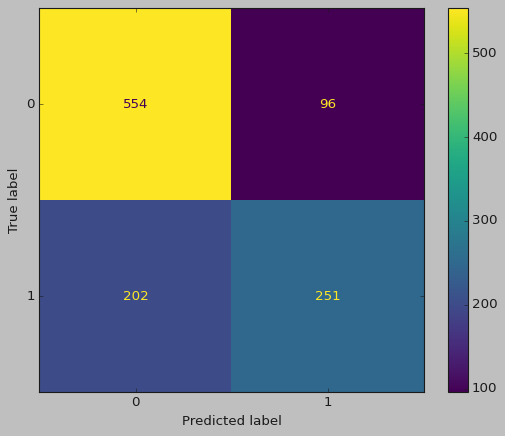

In [ ]:
# Matriz de confusion con hiperparametros ajustados
ConfusionMatrixDisplay.from_predictions(y_test, test_predsdt);

En este caso, con el ajuste de hiperparámetros, el modelo aumentó el accuracy, sin embargo, disminuyo el recall en el grupo 1, lo que supone un aumento en los falsos negativos.

# **SEGUNDO MODELO**
## *RANDOM FOREST PARÁMETROS POR DEFECTO*

In [ ]:
randomforest = RandomForestClassifier(random_state = 42)
randomforest.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rfpredicttrain = randomforest.predict(X_train_processed)
rfpredicttest = randomforest.predict(X_test_processed)

In [ ]:
randomforest_train_score = randomforest.score(X_train_processed, y_train)
randomforest_test_score = randomforest.score(X_test_processed, y_test)
print(randomforest_train_score)
print(randomforest_test_score)
# Modelo sobreajustado

1.0
0.7642792384406165


In [ ]:
# Metricas del modelo por defecto para test
print(classification_report(y_test, rfpredicttest))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       650
           1       0.76      0.63      0.69       453

    accuracy                           0.76      1103
   macro avg       0.76      0.74      0.75      1103
weighted avg       0.76      0.76      0.76      1103



## *RANDOM FOREST HIPERPARÁMETROS AJUSTADOS*

In [ ]:
# Busco los mejores parametros con grid search
rf_clf = RandomForestClassifier(random_state=42)
rf_param_grid = [{'n_estimators':  list(range(10, 300, 10)), 'max_depth':  list(range(1, 25, 1))}]
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=10, return_train_score=True, n_jobs=-1, verbose=2, scoring='recall')
rf_grid_search.fit(X_train_processed, y_train)
rf_cvres = rf_grid_search.cv_results_

for values in zip(rf_cvres['mean_test_score'], rf_cvres['params']):
  print(values) # Muestro el recall, n_estimator y max depth en cada prueba de validación
  # 1 hora 30 minutos

Fitting 10 folds for each of 696 candidates, totalling 6960 fits
(0.1645382111996409, {'max_depth': 1, 'n_estimators': 10})
(0.1727976658063068, {'max_depth': 1, 'n_estimators': 20})
(0.19006845471888675, {'max_depth': 1, 'n_estimators': 30})
(0.17879587027269667, {'max_depth': 1, 'n_estimators': 40})
(0.18254965772640555, {'max_depth': 1, 'n_estimators': 50})
(0.1802996296711929, {'max_depth': 1, 'n_estimators': 60})
(0.19082594546066659, {'max_depth': 1, 'n_estimators': 70})
(0.18556839860846144, {'max_depth': 1, 'n_estimators': 80})
(0.18632588935024125, {'max_depth': 1, 'n_estimators': 90})
(0.1915834362024464, {'max_depth': 1, 'n_estimators': 100})
(0.19309280664347436, {'max_depth': 1, 'n_estimators': 110})
(0.19459095499943885, {'max_depth': 1, 'n_estimators': 120})
(0.1833183705532488, {'max_depth': 1, 'n_estimators': 130})
(0.17955336101447644, {'max_depth': 1, 'n_estimators': 140})
(0.17579396251823587, {'max_depth': 1, 'n_estimators': 150})
(0.17880148131522836, {'max_depth'

In [ ]:
# Los mejores parametros encontrados con la data train
rf_grid_search.best_params_

{'max_depth': 22, 'n_estimators': 130}

In [ ]:
randomforest_22 = RandomForestClassifier(max_depth = 22, n_estimators = 130, random_state=42)
randomforest_22.fit(X_train_processed, y_train)
randomforest_22_train_score = randomforest_22.score(X_train_processed, y_train)
randomforest_22_test_score = randomforest_22.score(X_test_processed, y_test)
print(randomforest_22_train_score)
print(randomforest_22_test_score)
# Se redujo el sobreajuste pero no mejoró el accuracy del test

1.0
0.7633726201269265


In [ ]:
rf_grid_search_predstr = randomforest_22.predict(X_train_processed)
rf_grid_search_predstt = randomforest_22.predict(X_test_processed)
print(classification_report(y_test, rf_grid_search_predstt))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       650
           1       0.76      0.63      0.69       453

    accuracy                           0.76      1103
   macro avg       0.76      0.74      0.75      1103
weighted avg       0.76      0.76      0.76      1103



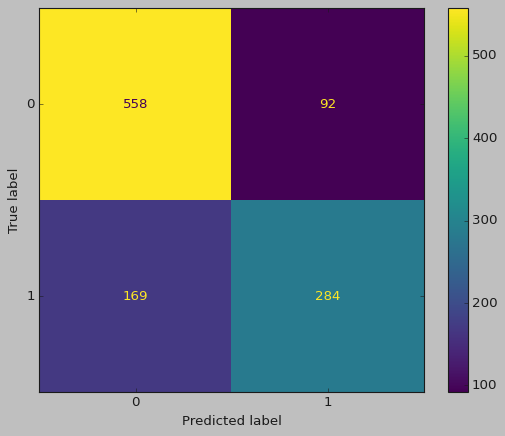

In [ ]:
# Matriz de confusion con hiperparametros ajustados
ConfusionMatrixDisplay.from_predictions(y_test, rf_grid_search_predstt);

# **TERCER MODELO**

# *KNN PARÁMETROS POR DEFECTO*

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_processed, y_train)

KNeighborsClassifier()

In [ ]:
knnpredicttrain = knn.predict(X_train_processed)
knnpredicttest = knn.predict(X_test_processed)

In [ ]:
knn_train_score = knn.score(X_train_processed, y_train)
knn_test_score = knn.score(X_test_processed, y_test)
print(knn_train_score)
print(knn_test_score)

0.8108189785433666
0.7252946509519492


In [ ]:
# Metricas del modelo por defecto para test
print(classification_report(y_test, knnpredicttest))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       650
           1       0.67      0.64      0.66       453

    accuracy                           0.73      1103
   macro avg       0.72      0.71      0.71      1103
weighted avg       0.72      0.73      0.72      1103



# *KNN HIPERPARÁMETROS AJUSTADOS*
# *RECALL*

In [ ]:
#Crear una lista de valores K para probar
k_valores = list(range(1, 100, 2))
#Crear un diccionario con los parametros a probar
param_grid = {'n_neighbors': k_valores, 'weights': ['uniform', 'distance'], 'leaf_size': range(10, 50, 5), 'p': range(1,6,1)}
#Crear un objeto GridSearchCV con el clasificador KNN y los parametros a probar
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='recall') 
#Ajustar el objeto GridSearchCV a los datos de entrenamiento
grid.fit(X_train_processed, y_train)
#Mostrar k
print('Valor K es', grid.best_params_['n_neighbors'])
# 27 minutos

Valor K es 3


In [ ]:
# Los mejores parametros encontrados con la data train
grid.best_params_

{'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [ ]:
knn1 = KNeighborsClassifier(leaf_size = 10, n_neighbors = 3, p = 1, weights = 'distance')# Hiperparametro buscado con recall
knn1.fit(X_train_processed, y_train) 
predictions1 = knn1.predict(X_test_processed)

In [ ]:
# Metricas del modelo con hiperparametros mejorados
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       650
           1       0.66      0.68      0.67       453

    accuracy                           0.72      1103
   macro avg       0.71      0.71      0.71      1103
weighted avg       0.72      0.72      0.72      1103



# *KNN HIPERPARÁMETROS AJUSTADOS*
# *ACCURACY*

In [ ]:
#Crear una lista de valores K para probar
k_valores = list(range(1, 100, 2))
#Crear un diccionario con los parametros a probar
param_grid = {'n_neighbors': k_valores, 'weights': ['uniform', 'distance'], 'leaf_size': range(10, 50, 5), 'p': range(1,6,1)}
#Crear un objeto GridSearchCV con el clasificador KNN y los parametros a probar
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy') # quiero disminuir el numero de falsos negativos por eso uso recall
#Ajustar el objeto GridSearchCV a los datos de entrenamiento
grid.fit(X_train_processed, y_train)
#Mostrar k
print('Valor K es', grid.best_params_['n_neighbors'])

Valor K es 11


In [ ]:
# Los mejores parametros encontrados con la data train
grid.best_params_

{'leaf_size': 10, 'n_neighbors': 11, 'p': 3, 'weights': 'distance'}

In [ ]:
knn2 = KNeighborsClassifier(leaf_size = 10, n_neighbors = 11, p = 3, weights = 'distance')# Hiperparametro buscado con accuracy
knn2.fit(X_train_processed, y_train) 
predictions2 = knn2.predict(X_test_processed)

In [ ]:
# Metricas del modelo con hiperparametros mejorados
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       650
           1       0.71      0.59      0.65       453

    accuracy                           0.73      1103
   macro avg       0.73      0.71      0.72      1103
weighted avg       0.73      0.73      0.73      1103



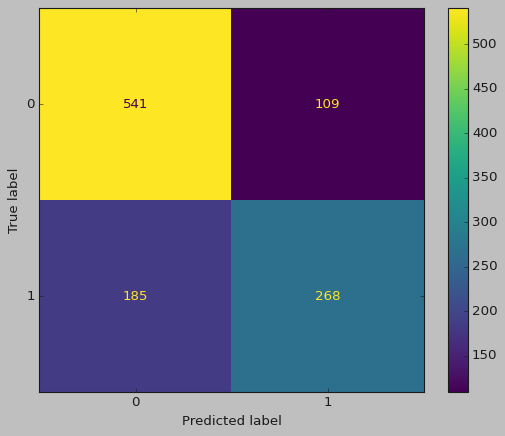

In [ ]:
# Matriz de confusion con hiperparametros ajustados
ConfusionMatrixDisplay.from_predictions(y_test, predictions2);

# **CUARTO MODELO**

# *LOGISTIC REGRESION PARÁMETROS POR DEFECTO*

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_processed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
logregpredicttrain = logreg.predict(X_train_processed)
logregpredicttest = logreg.predict(X_test_processed)

In [ ]:
logreg_train_score = logreg.score(X_train_processed, y_train)
logreg_test_score = logreg.score(X_test_processed, y_test)
print(logreg_train_score)
print(logreg_test_score)

0.7174372922333031
0.7262012692656392


In [ ]:
# Metricas del modelo por defecto para test
print(classification_report(y_test, logregpredicttest))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       650
           1       0.73      0.53      0.61       453

    accuracy                           0.73      1103
   macro avg       0.73      0.70      0.70      1103
weighted avg       0.73      0.73      0.72      1103



# *LOGISTIC REGRESION HIPERPARÁMETROS AJUSTADOS*

In [ ]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  logreg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  logreg.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(logreg.score(X_train_processed, y_train))
  test_scores.append(logreg.score(X_test_processed, y_test))

{0.0001: 0.5893019038984587,
 0.001: 0.5893019038984587,
 0.01: 0.7053490480507706,
 0.1: 0.729827742520399,
 1: 0.7252946509519492,
 10: 0.7262012692656392,
 100: 0.7271078875793291,
 1000: 0.7271078875793291}

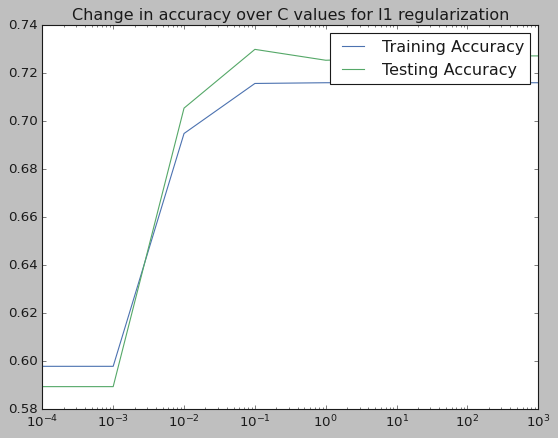

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

In [ ]:
# Prueba el modelo con hiperparametros ajustados
logreghp = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', penalty='l1')
logreghp.fit(X_train_processed, y_train)
predictionstrain1 = logreghp.predict(X_train_processed)
predictionstest1 = logreghp.predict(X_test_processed)

In [ ]:
# Metricas del modelo por hiperparametros
print(classification_report(y_test, predictionstest1))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       650
           1       0.74      0.52      0.61       453

    accuracy                           0.73      1103
   macro avg       0.73      0.70      0.70      1103
weighted avg       0.73      0.73      0.72      1103



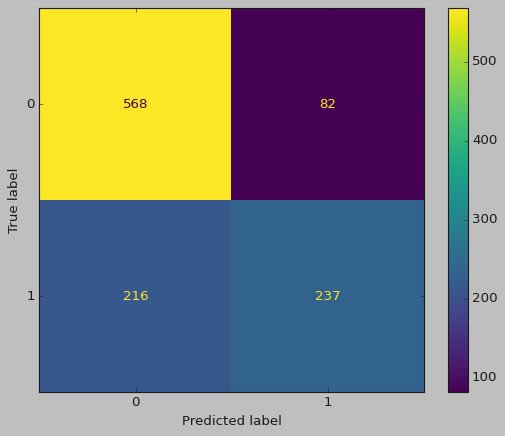

In [ ]:
# Matriz de confusion con hiperparametros ajustados con números
ConfusionMatrixDisplay.from_predictions(y_test, predictionstest1)

In [ ]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg.score(X_train_processed, y_train))
  test_scores.append(log_reg.score(X_test_processed, y_test))

{0.0001: 0.5983680870353582,
 0.001: 0.6890299184043518,
 0.01: 0.729827742520399,
 0.1: 0.728921124206709,
 1: 0.7271078875793291,
 10: 0.7271078875793291,
 100: 0.7280145058930191,
 1000: 0.7280145058930191}

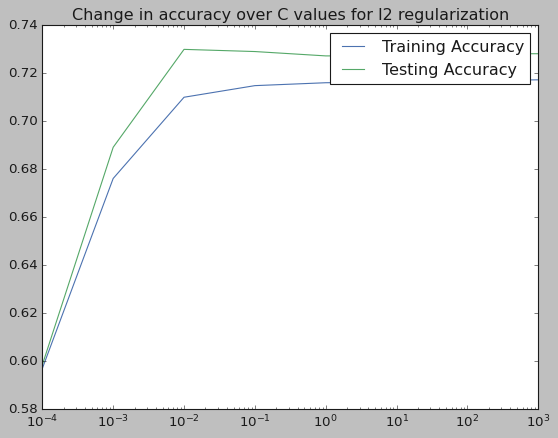

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

In [ ]:
# Pruebo el modelo con hiperparámetros ajustados
logreghp = LogisticRegression(C=0.01, max_iter=1000, solver='liblinear', penalty='l2')
logreghp.fit(X_train_processed, y_train)
predictionstrain = logreghp.predict(X_train_processed)
predictionstest = logreghp.predict(X_test_processed)

In [ ]:
# Metricas del modelo por hiperparametros
print(classification_report(y_test, predictionstest))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       650
           1       0.75      0.52      0.61       453

    accuracy                           0.73      1103
   macro avg       0.73      0.70      0.70      1103
weighted avg       0.73      0.73      0.72      1103



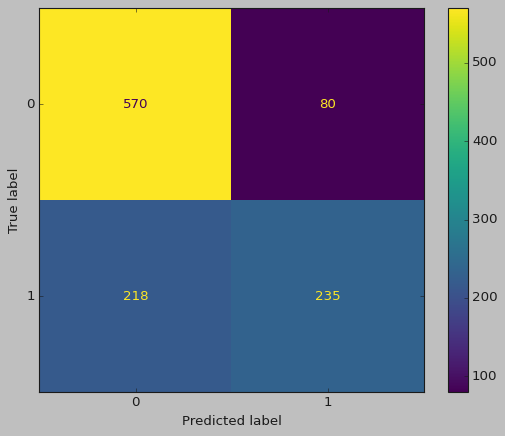

In [ ]:
# Matriz de confusion con hiperparametros ajustados con números
ConfusionMatrixDisplay.from_predictions(y_test, predictionstest)

# **QUINTO MODELO**

# *XGBOOST PARÁMETROS POR DEFECTO*

In [ ]:
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train_processed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
xgbpredicttrain = xgb.predict(X_train_processed)
xgbpredicttest = xgb.predict(X_test_processed)

In [ ]:
xgb_train_score = xgb.score(X_train_processed, y_train)
xgb_test_score = xgb.score(X_test_processed, y_test)
print(xgb_train_score)
print(xgb_test_score)

0.9842852825627078
0.7624660018132366


In [ ]:
# Metricas del modelo por defecto para test
print(classification_report(y_test, xgbpredicttest))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81       650
           1       0.74      0.65      0.69       453

    accuracy                           0.76      1103
   macro avg       0.76      0.74      0.75      1103
weighted avg       0.76      0.76      0.76      1103



# *XGBOOST HIPERPARÁMETROS AJUSTADOS*

In [ ]:
# Busco los mejores parametros con grid search
xgb_clf = XGBClassifier(random_state=42)
xgb_param_grid = [{'n_estimators':  list(range(10, 300, 30)), 'max_depth':  list(range(1, 25, 3))}]
xgb_grid_search = GridSearchCV(xgb_clf, xgb_param_grid, cv=10, return_train_score=True, n_jobs=-1, verbose=2, scoring='recall')
xgb_grid_search.fit(X_train_processed, y_train)
xgb_cvres = xgb_grid_search.cv_results_

for values in zip(xgb_cvres['mean_test_score'], xgb_cvres['params']):
  print(values) # Muestro el recall, n_estimator y max depth en cada prueba de validación


Fitting 10 folds for each of 80 candidates, totalling 800 fits
(0.42751655257546856, {'max_depth': 1, 'n_estimators': 10})
(0.5116765795084727, {'max_depth': 1, 'n_estimators': 40})
(0.5357198967568173, {'max_depth': 1, 'n_estimators': 70})
(0.5492368982156886, {'max_depth': 1, 'n_estimators': 100})
(0.553753787453709, {'max_depth': 1, 'n_estimators': 130})
(0.5552575468522052, {'max_depth': 1, 'n_estimators': 160})
(0.5552519358096735, {'max_depth': 1, 'n_estimators': 190})
(0.5529962967119291, {'max_depth': 1, 'n_estimators': 220})
(0.5567500841656381, {'max_depth': 1, 'n_estimators': 250})
(0.561255751318595, {'max_depth': 1, 'n_estimators': 280})
(0.5725171136797218, {'max_depth': 4, 'n_estimators': 10})
(0.593569745258669, {'max_depth': 4, 'n_estimators': 40})
(0.5950678936146336, {'max_depth': 4, 'n_estimators': 70})
(0.6003254404668388, {'max_depth': 4, 'n_estimators': 100})
(0.6100942655145326, {'max_depth': 4, 'n_estimators': 130})
(0.6093479968578162, {'max_depth': 4, 'n_esti

In [ ]:
# Los mejores parametros encontrados con la data train
xgb_grid_search.best_params_

{'max_depth': 4, 'n_estimators': 280}

In [ ]:
xgb2 = XGBClassifier(max_depth = 4, n_estimators = 280, random_state=42)
xgb2.fit(X_train_processed, y_train)
xgb2_train_score = xgb2.score(X_train_processed, y_train)
xgb2_test_score = xgb2.score(X_test_processed, y_test)
print(xgb2_train_score)
print(xgb2_test_score)
# Se redujo el sobreajuste pero no mejoró el accuracy del test

0.9845874886672711
0.757026291931097


In [ ]:
xgb_grid_search_predstr = xgb2.predict(X_train_processed)
xgb_grid_search_predstt = xgb2.predict(X_test_processed)
print(classification_report(y_test, xgb_grid_search_predstt))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       650
           1       0.73      0.65      0.69       453

    accuracy                           0.76      1103
   macro avg       0.75      0.74      0.74      1103
weighted avg       0.76      0.76      0.75      1103



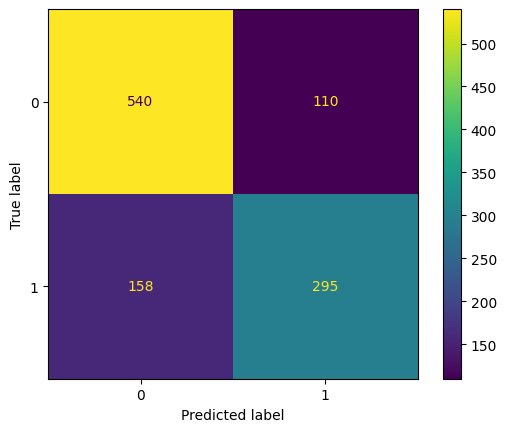

In [ ]:
# Matriz de confusion con hiperparametros ajustados
ConfusionMatrixDisplay.from_predictions(y_test, xgb_grid_search_predstt);

# **SEXTO MODELO**

# *LIGHTGBM PARÁMETROS POR DEFECTO*

In [ ]:
lgbm = LGBMClassifier(n_estimators=100, random_state=42)
lgbm.fit(X_train_processed, y_train)

LGBMClassifier(random_state=42)

In [ ]:
lgbm_train_score = lgbm.score(X_train_processed, y_train)
lgbm_test_score = lgbm.score(X_test_processed, y_test)
print('Train score:', lgbm.score(X_train_processed, y_train))
print('Test score:', lgbm.score(X_test_processed, y_test))

Train score: 0.9208220006044122
Test score: 0.7561196736174071


In [ ]:
# Metricas del modelo por defecto para test
lgbmpredicttrain = lgbm.predict(X_train_processed)
lgbmpredicttest = lgbm.predict(X_test_processed)
print(classification_report(y_test, lgbmpredicttest))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       650
           1       0.75      0.61      0.67       453

    accuracy                           0.76      1103
   macro avg       0.75      0.73      0.74      1103
weighted avg       0.76      0.76      0.75      1103



# *LIGHTGBM HIPERPARÁMETROS AJUSTADOS*

In [ ]:
# Busco los mejores parametros con grid search
lgbm_clf = LGBMClassifier(random_state=42)
lgbm_param_grid = [{'n_estimators':  list(range(10, 300, 30)), 'max_depth':  list(range(1, 25, 3))}]
lgbm_grid_search = GridSearchCV(lgbm_clf, lgbm_param_grid, cv=10, return_train_score=True, n_jobs=-1, verbose=2, scoring='accuracy')
lgbm_grid_search.fit(X_train_processed, y_train)
lgbm_cvres = lgbm_grid_search.cv_results_

for values in zip(lgbm_cvres['mean_test_score'], lgbm_cvres['params']):
  print(values) # Muestro el recall, n_estimator y max depth en cada prueba de validación

Fitting 10 folds for each of 80 candidates, totalling 800 fits
(0.6890323171289939, {'max_depth': 1, 'n_estimators': 10})
(0.7183383685800605, {'max_depth': 1, 'n_estimators': 40})
(0.7280078732948824, {'max_depth': 1, 'n_estimators': 70})
(0.7313320516341665, {'max_depth': 1, 'n_estimators': 100})
(0.7379804083127345, {'max_depth': 1, 'n_estimators': 130})
(0.7379804083127345, {'max_depth': 1, 'n_estimators': 160})
(0.7404000732399524, {'max_depth': 1, 'n_estimators': 190})
(0.7407031035429827, {'max_depth': 1, 'n_estimators': 220})
(0.742515792364735, {'max_depth': 1, 'n_estimators': 250})
(0.741005218346608, {'max_depth': 1, 'n_estimators': 280})
(0.7304257072232903, {'max_depth': 4, 'n_estimators': 10})
(0.7540025633983337, {'max_depth': 4, 'n_estimators': 40})
(0.7488675272361073, {'max_depth': 4, 'n_estimators': 70})
(0.745239403094388, {'max_depth': 4, 'n_estimators': 100})
(0.7446333424883274, {'max_depth': 4, 'n_estimators': 130})
(0.7446351734871371, {'max_depth': 4, 'n_estim

In [ ]:
# Los mejores parametros encontrados con la data train
lgbm_grid_search.best_params_

{'max_depth': 4, 'n_estimators': 40}

In [ ]:
lgbm2 = LGBMClassifier(max_depth = 4, n_estimators = 40, random_state=42)
lgbm2.fit(X_train_processed, y_train)
lgbm2_train_score = lgbm2.score(X_train_processed, y_train)
lgbm2_test_score = lgbm2.score(X_test_processed, y_test)
print(lgbm2_train_score)
print(lgbm2_test_score)
# Se redujo el sobreajuste pero no mejoró el accuracy del test

0.7926866122695678
0.7497733454215775


In [ ]:
# Metricas del modelo por defecto para test
lgbm_grid_search_predstr = lgbm2.predict(X_train_processed)
lgbm_grid_search_predstt = lgbm2.predict(X_test_processed)
print(classification_report(y_test, lgbm_grid_search_predstt))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       650
           1       0.74      0.60      0.66       453

    accuracy                           0.75      1103
   macro avg       0.75      0.73      0.73      1103
weighted avg       0.75      0.75      0.74      1103



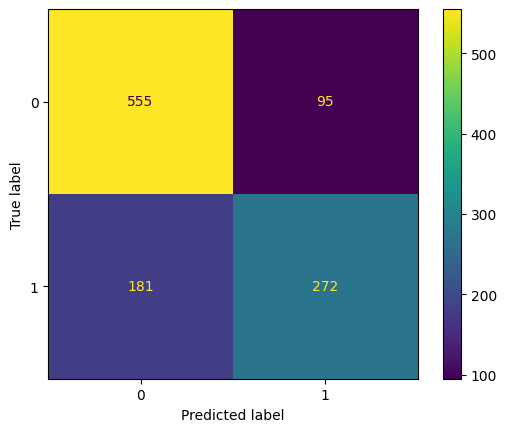

In [ ]:
# Matriz de confusion con hiperparametros ajustados
ConfusionMatrixDisplay.from_predictions(y_test, lgbm_grid_search_predstt);

# **SÉPTIMO MODELO**
# *REDES NEURONALES*

# *NN 1*

In [ ]:
# Definir numero de caracteristicas de entrada
input_shape = X_train_processed.shape[1]
input_shape

11

In [ ]:
# Indicar el tipo de modelo
model = Sequential()
# Primera capa de entrada
model.add(Dense(11, input_dim = input_shape, activation = 'relu')) 
# Segunda capa de entrada
model.add(Dense(10, activation = 'relu')) 
# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))
# Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics =['Accuracy'])
# Step 3: Fit our model
history = model.fit(X_train_processed, y_train, validation_data = (X_test_processed, y_test), epochs=30)

Epoch 1/30
104/104 [==============================] - 2s 11ms/step - loss: 1.7446 - Accuracy: 0.5189 - val_loss: 0.6756 - val_Accuracy: 0.5830
Epoch 2/30
104/104 [==============================] - 1s 8ms/step - loss: 0.6560 - Accuracy: 0.6277 - val_loss: 0.6410 - val_Accuracy: 0.6546
Epoch 3/30
104/104 [==============================] - 1s 8ms/step - loss: 0.6301 - Accuracy: 0.6555 - val_loss: 0.6211 - val_Accuracy: 0.6782
Epoch 4/30
104/104 [==============================] - 1s 8ms/step - loss: 0.6195 - Accuracy: 0.6694 - val_loss: 0.6111 - val_Accuracy: 0.6718
Epoch 5/30
104/104 [==============================] - 1s 9ms/step - loss: 0.6105 - Accuracy: 0.6751 - val_loss: 0.6217 - val_Accuracy: 0.6691
Epoch 6/30
104/104 [==============================] - 1s 7ms/step - loss: 0.6031 - Accuracy: 0.6818 - val_loss: 0.5882 - val_Accuracy: 0.7081
Epoch 7/30
104/104 [==============================] - 0s 4ms/step - loss: 0.6091 - Accuracy: 0.6797 - val_loss: 0.6344 - val_Accuracy: 0.6437
Epoch

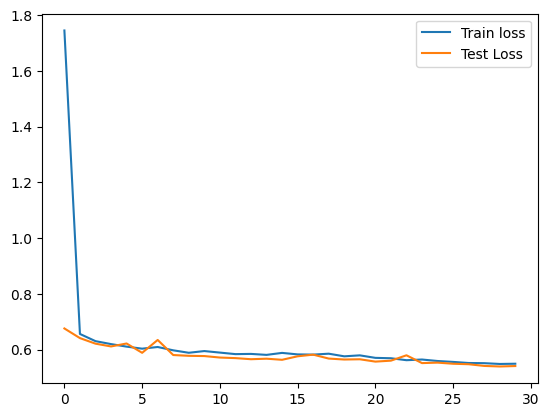

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
loss, acc = model.evaluate(X_test_processed, y_test, batch_size=32)
print("Loss:", loss) 
print("Accuracy:", acc)

35/35 [==============================] - 0s 3ms/step - loss: 0.5408 - Accuracy: 0.7389
Loss: 0.5408141016960144
Accuracy: 0.7388939261436462


In [ ]:
train_preds = model.predict(X_train_processed)
test_preds = model.predict(X_test_processed)
test_preds1 = test_preds.flatten().round().astype(int)

35/35 [==============================] - 0s 2ms/step


In [ ]:
# Metricas del modelo con hiperparametros mejorados
print(classification_report(y_test, test_preds1))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       650
           1       0.70      0.64      0.67       453

    accuracy                           0.74      1103
   macro avg       0.73      0.72      0.73      1103
weighted avg       0.74      0.74      0.74      1103



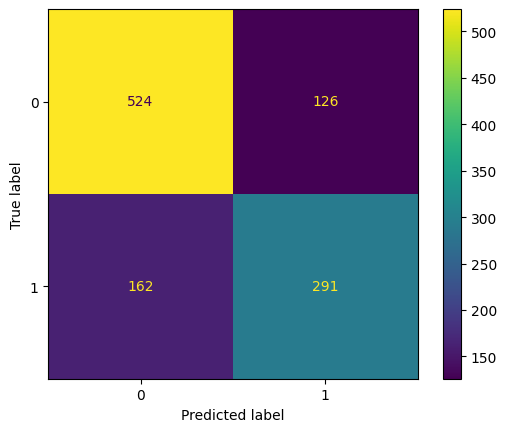

In [ ]:
# Matriz de confusion con hiperparametros ajustados
ConfusionMatrixDisplay.from_predictions(y_test, test_preds1);

# *NN 2*

In [ ]:
# Indicar el tipo de modelo
model2 = Sequential()
# Primera capa de entrada
model2.add(Dense(11, input_dim = input_shape, activation = 'relu')) 
model2.add(Dropout(0.2))
# Segunda capa de entrada
model2.add(Dense(10, activation = 'relu')) 
model2.add(Dropout(0.3))
# Capa de salida
model2.add(Dense(1, activation = 'sigmoid'))
# Compile
model2.compile(loss = 'bce', optimizer = 'adam', metrics =['Accuracy'])
# Step 3: Fit our model
history2 = model2.fit(X_train_processed, y_train, validation_data = (X_test_processed, y_test), epochs=100)

Epoch 1/100
104/104 [==============================] - 2s 6ms/step - loss: 0.8883 - Accuracy: 0.5171 - val_loss: 0.6921 - val_Accuracy: 0.5675
Epoch 2/100
104/104 [==============================] - 0s 4ms/step - loss: 0.7564 - Accuracy: 0.5570 - val_loss: 0.6820 - val_Accuracy: 0.5993
Epoch 3/100
104/104 [==============================] - 0s 4ms/step - loss: 0.7095 - Accuracy: 0.5887 - val_loss: 0.6776 - val_Accuracy: 0.6038
Epoch 4/100
104/104 [==============================] - 0s 4ms/step - loss: 0.6878 - Accuracy: 0.6108 - val_loss: 0.6742 - val_Accuracy: 0.5911
Epoch 5/100
104/104 [==============================] - 0s 4ms/step - loss: 0.6702 - Accuracy: 0.6238 - val_loss: 0.6685 - val_Accuracy: 0.5975
Epoch 6/100
104/104 [==============================] - 0s 3ms/step - loss: 0.6654 - Accuracy: 0.6277 - val_loss: 0.6541 - val_Accuracy: 0.6410
Epoch 7/100
104/104 [==============================] - 0s 3ms/step - loss: 0.6518 - Accuracy: 0.6503 - val_loss: 0.6443 - val_Accuracy: 0.6464

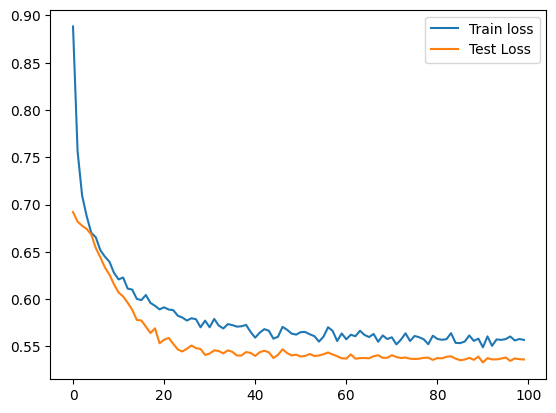

In [ ]:
# Visualize the loss
plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
loss2, acc2 = model2.evaluate(X_test_processed, y_test, batch_size=32)
print("Loss:", loss2) # Función de pérdida
print("Accuracy:", acc2)

35/35 [==============================] - 0s 2ms/step - loss: 0.5363 - Accuracy: 0.7471
Loss: 0.5362944006919861
Accuracy: 0.7470535039901733


In [ ]:
train_preds2 = model2.predict(X_train_processed)
test_preds2 = model2.predict(X_test_processed)
test_preds22 = test_preds2.flatten().round().astype(int)

35/35 [==============================] - 0s 1ms/step


In [ ]:
# Metricas del modelo con hiperparametros mejorados
print(classification_report(y_test, test_preds22))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       650
           1       0.76      0.56      0.64       453

    accuracy                           0.75      1103
   macro avg       0.75      0.72      0.72      1103
weighted avg       0.75      0.75      0.74      1103



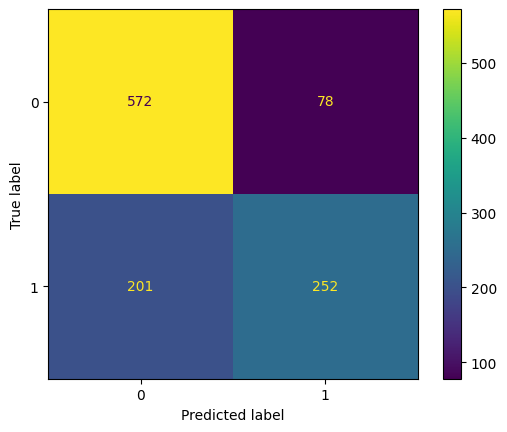

In [ ]:
# Matriz de confusion con hiperparametros ajustados
ConfusionMatrixDisplay.from_predictions(y_test, test_preds22);

# *NN 3*

In [ ]:
# Indicar el tipo de modelo
model3 = Sequential()
# Primera capa de entrada
model3.add(Dense(11, input_dim = input_shape, activation = 'relu')) 
# Segunda capa de entrada
model3.add(Dense(10, activation = 'relu')) 
# Capa de salida
model3.add(Dense(1, activation = 'sigmoid'))
# Compile
model3.compile(loss = 'bce', optimizer = 'adam', metrics =['Accuracy'])
early_stop = EarlyStopping(patience = 5)
# Step 3: Fit our model
history3 = model3.fit(X_train_processed, y_train, validation_data = (X_test_processed, y_test),callbacks = [early_stop], epochs=100)

Epoch 1/100
104/104 [==============================] - 2s 6ms/step - loss: 2.5910 - Accuracy: 0.5950 - val_loss: 0.7375 - val_Accuracy: 0.5639
Epoch 2/100
104/104 [==============================] - 0s 2ms/step - loss: 0.6658 - Accuracy: 0.5960 - val_loss: 0.6450 - val_Accuracy: 0.6183
Epoch 3/100
104/104 [==============================] - 0s 3ms/step - loss: 0.6296 - Accuracy: 0.6516 - val_loss: 0.6167 - val_Accuracy: 0.6854
Epoch 4/100
104/104 [==============================] - 0s 3ms/step - loss: 0.6112 - Accuracy: 0.6800 - val_loss: 0.6019 - val_Accuracy: 0.6999
Epoch 5/100
104/104 [==============================] - 0s 3ms/step - loss: 0.6000 - Accuracy: 0.6842 - val_loss: 0.5917 - val_Accuracy: 0.7099
Epoch 6/100
104/104 [==============================] - 0s 3ms/step - loss: 0.5923 - Accuracy: 0.6990 - val_loss: 0.5848 - val_Accuracy: 0.7162
Epoch 7/100
104/104 [==============================] - 0s 2ms/step - loss: 0.5863 - Accuracy: 0.7035 - val_loss: 0.5788 - val_Accuracy: 0.7180

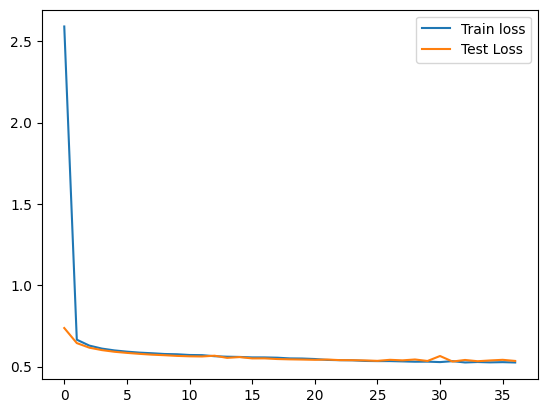

In [ ]:
# Visualize the loss
plt.plot(history3.history['loss'], label='Train loss')
plt.plot(history3.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
loss3, acc3 = model3.evaluate(X_test_processed, y_test, batch_size=32)
print("Loss:", loss3) # Función de pérdida
print("Accuracy:", acc3)

35/35 [==============================] - 0s 2ms/step - loss: 0.5352 - Accuracy: 0.7443
Loss: 0.5351892709732056
Accuracy: 0.7443336248397827


In [ ]:
train_preds3 = model3.predict(X_train_processed)
test_preds3 = model3.predict(X_test_processed)
test_preds33 = test_preds3.flatten().round().astype(int)

35/35 [==============================] - 0s 2ms/step


In [ ]:
# Metricas del modelo con hiperparametros mejorados
print(classification_report(y_test, test_preds33))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       650
           1       0.77      0.54      0.63       453

    accuracy                           0.74      1103
   macro avg       0.75      0.71      0.72      1103
weighted avg       0.75      0.74      0.73      1103



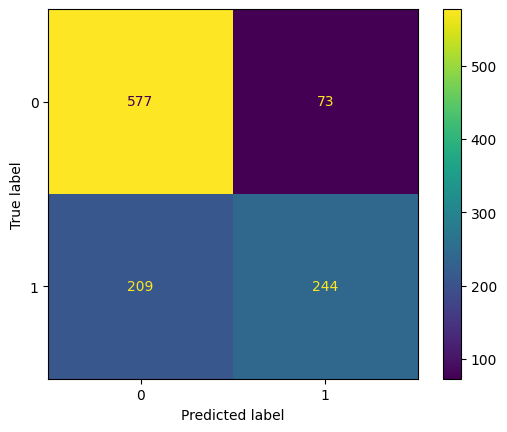

In [ ]:
# Matriz de confusion con hiperparametros ajustados
ConfusionMatrixDisplay.from_predictions(y_test, test_preds33);

# *NN 4*

In [ ]:
# Indicar el tipo de modelo
model4 = Sequential()
# Primera capa de entrada
model4.add(Dense(11, input_dim = input_shape, activation = 'sigmoid')) 
# Segunda capa de entrada
model4.add(Dense(10, activation = 'sigmoid')) 
# Capa de salida
model4.add(Dense(1, activation = 'sigmoid'))
# Compile
model4.compile(loss = 'bce', optimizer = 'adam', metrics =['Accuracy'])
early_stop = EarlyStopping(patience = 5)
# Step 3: Fit our model
history4 = model4.fit(X_train_processed, y_train, validation_data = (X_test_processed, y_test),callbacks = [early_stop], epochs=100)

Epoch 1/100
104/104 [==============================] - 1s 5ms/step - loss: 0.6799 - Accuracy: 0.5742 - val_loss: 0.6767 - val_Accuracy: 0.5893
Epoch 2/100
104/104 [==============================] - 0s 4ms/step - loss: 0.6735 - Accuracy: 0.5978 - val_loss: 0.6756 - val_Accuracy: 0.5893
Epoch 3/100
104/104 [==============================] - 0s 4ms/step - loss: 0.6718 - Accuracy: 0.5978 - val_loss: 0.6733 - val_Accuracy: 0.5893
Epoch 4/100
104/104 [==============================] - 0s 4ms/step - loss: 0.6675 - Accuracy: 0.5978 - val_loss: 0.6655 - val_Accuracy: 0.5893
Epoch 5/100
104/104 [==============================] - 0s 4ms/step - loss: 0.6580 - Accuracy: 0.5978 - val_loss: 0.6546 - val_Accuracy: 0.5893
Epoch 6/100
104/104 [==============================] - 0s 4ms/step - loss: 0.6469 - Accuracy: 0.5981 - val_loss: 0.6428 - val_Accuracy: 0.5920
Epoch 7/100
104/104 [==============================] - 0s 4ms/step - loss: 0.6336 - Accuracy: 0.6189 - val_loss: 0.6275 - val_Accuracy: 0.6183

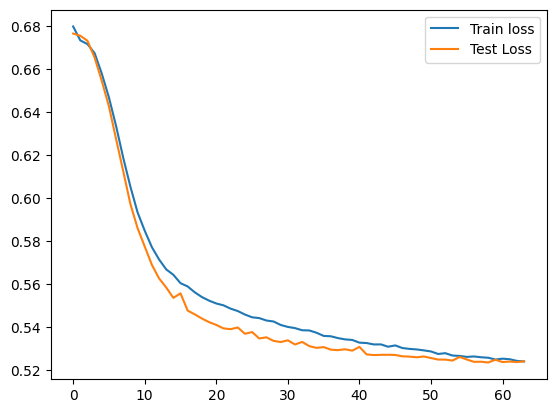

In [ ]:
# Visualize the loss
plt.plot(history4.history['loss'], label='Train loss')
plt.plot(history4.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
loss4, acc4 = model4.evaluate(X_test_processed, y_test, batch_size=32)
print("Loss:", loss4) # Función de pérdida
print("Recall:", acc4)

35/35 [==============================] - 0s 3ms/step - loss: 0.5240 - Accuracy: 0.7434
Loss: 0.5240380167961121
Recall: 0.743427038192749


In [ ]:
train_preds4 = model4.predict(X_train_processed)
test_preds4 = model4.predict(X_test_processed)
test_preds44 = test_preds4.flatten().round().astype(int)

35/35 [==============================] - 0s 1ms/step


In [ ]:
# Metricas del modelo con hiperparametros mejorados
print(classification_report(y_test, test_preds44))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       650
           1       0.70      0.66      0.68       453

    accuracy                           0.74      1103
   macro avg       0.74      0.73      0.73      1103
weighted avg       0.74      0.74      0.74      1103



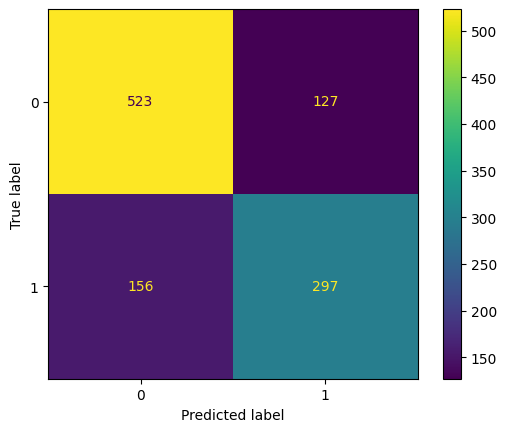

In [ ]:
# Matriz de confusion con hiperparametros ajustados
ConfusionMatrixDisplay.from_predictions(y_test, test_preds44);

# **NUEVO DF AGREGANDO COLUMNA VALOR CRITICO**
Creo una nueva columna para evaluar si el modelo predictivo tiene bajo rendimiento por posible falta de información. La nuevca columna corresponde a VC (valor crítico), e informa si alguno de los valores de la columna corresponde o no a un valor crítico.

In [ ]:
filename = '/content/drive/MyDrive/Documentos CodingDojo/dataori2.xlsx'
df2 = pd.read_excel(filename)
df2

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE,VC
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out,NO
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out,NO
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out,NO
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out,NO
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in,NO
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in,NO
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out,NO
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in,NO


In [ ]:
df2['VC'].value_counts()

NO     4161
YES     236
Yes      15
Name: VC, dtype: int64

In [ ]:
df2['VC'] = df2['VC'].replace('Yes', 'YES')

In [ ]:
# Convertir los nombres de cadenas de las clases para valores numéricos.
df2['SOURCE'] = df2['SOURCE'].replace({'out': 0, 'in': 1})

# Ordenar los datos en matriz de características y vector objetivo
y = df2['SOURCE']
X = df2.drop(columns = 'SOURCE')

# Realizar un train test split (modelo de validación), lo realizo 75 y 25 por defecto, a pesar de que la matriz está levemente desbalanceada
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Instanciar selectores de columnas
num_selector = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV']
cat_selector = ['SEX', 'VC']
ord_selector = ['AGE']

# Escalo datos numéricos porque todos están en diferentes unidades de medida
# Hago one hot encoder para la columna sex que está clasificada como M y F
scaler = StandardScaler() 
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Hago el pipeline
numeric_pipe = make_pipeline(scaler) 
categorical_pipe = make_pipeline(ohe) 

number_tuple = (numeric_pipe, num_selector) 
category_tuple = (categorical_pipe, cat_selector) 

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder = 'passthrough')
preprocessor.fit(X_train)

X_train_processed2 = preprocessor.transform(X_train)
X_test_processed2 = preprocessor.transform(X_test)

X_train_df2 = pd.DataFrame(X_train_processed2)
X_train_df2.columns=preprocessor.get_feature_names_out()
X_train_df2.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,pipeline-1__HAEMATOCRIT,pipeline-1__HAEMOGLOBINS,pipeline-1__ERYTHROCYTE,pipeline-1__LEUCOCYTE,pipeline-1__THROMBOCYTE,pipeline-1__MCH,pipeline-1__MCHC,pipeline-1__MCV,pipeline-2__SEX_F,pipeline-2__SEX_M,pipeline-2__VC_NO,pipeline-2__VC_YES,remainder__AGE
0,0.291646,0.305621,0.267056,-0.032418,0.464202,-0.025371,0.125611,-0.073338,0.0,1.0,1.0,0.0,61.0
1,0.424955,0.687984,1.061243,-0.582121,-1.792840,-0.699088,1.193476,-1.269217,0.0,1.0,1.0,0.0,14.0
2,-0.041626,-0.315718,0.779435,-0.130579,0.516488,-1.784522,-1.270828,-1.590063,0.0,1.0,1.0,0.0,51.0
3,-0.174935,0.018849,-0.117229,-0.601753,0.359628,0.199201,0.864902,-0.160842,0.0,1.0,1.0,0.0,31.0
4,0.624919,0.831370,0.612912,-0.464327,0.246340,0.236630,0.947045,-0.146258,0.0,1.0,1.0,0.0,31.0


Uso los mejores hiperparámetros de los modelos anteriores, de forma de explorar si es que el agregar una columna más de información a mi dataset infiera en la mejora de las métricas

# *DECISION TREE*

In [ ]:
# Ejecutemos el modelo con nuestro valor optimizado para max_depth que segun el grafico es 5
decision_tree_5_2 = DecisionTreeClassifier(max_depth = 5, random_state = 42)
decision_tree_5_2.fit(X_train_processed2, y_train)
train_5_score = decision_tree_5_2.score(X_train_processed2, y_train)
test_5_score = decision_tree_5_2.score(X_test_processed2, y_test)
print('train_5_score', train_5_score)
print('test_5_score', test_5_score)

train_predsdt2 = decision_tree_5_2.predict(X_train_processed2)
test_predsdt2 = decision_tree_5_2.predict(X_test_processed2)

# Metricas del modelo con hiperparametros mejorados
print(classification_report(y_test, test_predsdt))

train_5_score 0.7645814445451798
test_5_score 0.729827742520399
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       650
           1       0.72      0.55      0.63       453

    accuracy                           0.73      1103
   macro avg       0.73      0.70      0.71      1103
weighted avg       0.73      0.73      0.72      1103



# *RANDOM FOREST*

In [ ]:
randomforest2 = RandomForestClassifier(max_depth = 22, n_estimators = 130, random_state=42)
randomforest2.fit(X_train_processed2, y_train)
randomforest2_train_score = randomforest2.score(X_train_processed2, y_train)
randomforest2_test_score = randomforest2.score(X_test_processed2, y_test)
print(randomforest2_train_score)
print(randomforest2_test_score)
# Se redujo el sobreajuste pero no mejoró el accuracy del test

rf_grid_search_predstr2 = randomforest2.predict(X_train_processed2)
rf_grid_search_predstt2 = randomforest2.predict(X_test_processed2)
print(classification_report(y_test, rf_grid_search_predstt2))

1.0
0.7669990933816863
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       650
           1       0.76      0.63      0.69       453

    accuracy                           0.77      1103
   macro avg       0.77      0.75      0.75      1103
weighted avg       0.77      0.77      0.76      1103



# *KNN*

In [ ]:
knn3 = KNeighborsClassifier(leaf_size = 10, n_neighbors = 11, p = 3, weights = 'distance')
knn3.fit(X_train_processed2, y_train) 
predictions3 = knn3.predict(X_test_processed2)

# Metricas del modelo con hiperparametros mejorados
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       650
           1       0.72      0.58      0.64       453

    accuracy                           0.73      1103
   macro avg       0.73      0.71      0.72      1103
weighted avg       0.73      0.73      0.73      1103



# *LOGISTIC REGRESION*

In [ ]:
logreghp1 = LogisticRegression(C=0.01, max_iter=1000, solver='liblinear', penalty='l2')
logreghp1.fit(X_train_processed2, y_train)
predictionstrain1 = logreghp1.predict(X_train_processed2)
predictionstest1 = logreghp1.predict(X_test_processed2)

# Metricas del modelo por hiperparametros
print(classification_report(y_test, predictionstest1))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       650
           1       0.75      0.51      0.60       453

    accuracy                           0.73      1103
   macro avg       0.73      0.69      0.70      1103
weighted avg       0.73      0.73      0.71      1103



# *XGBOOST*

In [ ]:
xgb3 = XGBClassifier(max_depth = 4, n_estimators = 280, random_state=42)
xgb3.fit(X_train_processed2, y_train)
xgb3_train_score = xgb3.score(X_train_processed2, y_train)
xgb3_test_score = xgb3.score(X_test_processed2, y_test)
print(xgb3_train_score)
print(xgb3_test_score)


0.9836808703535811
0.7624660018132366


In [ ]:
xgb3_grid_search_predstr = xgb3.predict(X_train_processed2)
xgb3_grid_search_predstt = xgb3.predict(X_test_processed2)
print(classification_report(y_test, xgb3_grid_search_predstt))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81       650
           1       0.74      0.65      0.69       453

    accuracy                           0.76      1103
   macro avg       0.76      0.75      0.75      1103
weighted avg       0.76      0.76      0.76      1103



# *LIGHTBOOST*

In [ ]:
lgbm3 = LGBMClassifier(max_depth = 4, n_estimators = 40, random_state=42)
lgbm3.fit(X_train_processed2, y_train)
lgbm3_train_score = lgbm3.score(X_train_processed2, y_train)
lgbm3_test_score = lgbm3.score(X_test_processed2, y_test)
print(lgbm3_train_score)
print(lgbm3_test_score)

0.7926866122695678
0.7497733454215775


In [ ]:
# Metricas del modelo por defecto para test
lgbm3_grid_search_predstr = lgbm3.predict(X_train_processed2)
lgbm3_grid_search_predstt = lgbm3.predict(X_test_processed2)
print(classification_report(y_test, lgbm3_grid_search_predstt))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       650
           1       0.74      0.60      0.66       453

    accuracy                           0.75      1103
   macro avg       0.75      0.73      0.73      1103
weighted avg       0.75      0.75      0.74      1103



# **DATASET SIN TARGET**
Para lograr mejorar las métricas se puede agrupar el dataset en clúster para ver como se comporta el modelo y poder crear nuevas columnas con la información extraída. 

Comienzo utilizando una copia del dataset original.

In [ ]:
# Creo una copia del dataset para poder trabajar la limpieza y preprocesamiento en ella
df2 = df.copy()
df2.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,0


In [ ]:
# Reemplazo mi columna objetivo por 0 para out(ambulatorio) y 1 para in(hospitalizado)
df2['SOURCE'] = df2['SOURCE'].replace({'out':0, 'in':1})
df2.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,0


In [ ]:
# Reemplazo mi columna objetivo por 0 para out(ambulatorio) y 1 para in(hospitalizado)
df2['SEX'] = df2['SEX'].replace({'F':0, 'M':1})
df2.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,0,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,0,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,0,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,1,0


In [ ]:
# A pesar de que la columna Gender, disability y passed-course son en estricto rigor categoricas y estan con 0 y 1, las escalo ya que ya se encuentran transformadas.
# Fit & transform data
scaler = StandardScaler()
df2_escalado = scaler.fit_transform(df2)

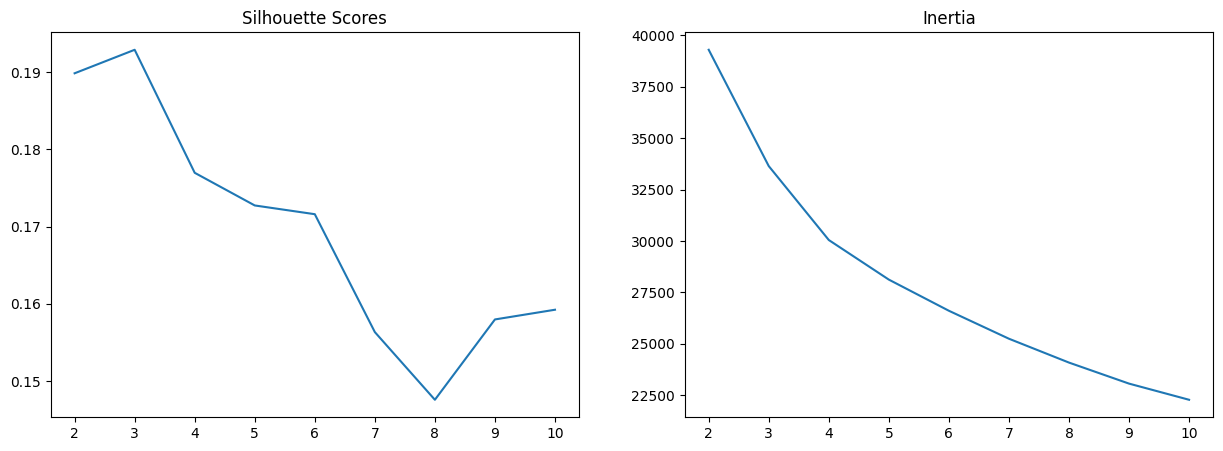

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ks = range(2,11)
silhouette = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
  kmeans.fit(df2_escalado)
  silhouette.append(silhouette_score(df2_escalado, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, silhouette)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

Utilizo 3 clúster. En el gráfico elbow no se ve tan marcado el codo, por lo que decido utilizar el silhouette para establecer los clúster y me decido por 3.

In [ ]:
# ELBOW METHOD 3 CLUSTER
# Refit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init = 10)
kmeans.fit(df2_escalado)
# Add the clusters as a column in the dataframe
df2['cluster'] = kmeans.labels_
df2.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE,cluster
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0,0,2
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,0,0,1
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,0,0,2
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,0,0,1
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,1,0,2


In [ ]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups3 = df2.groupby('cluster', as_index=False).mean()
cluster_groups3

,cluster,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,0,32.794521,10.957877,3.734301,10.592740,252.910274,29.405205,33.429178,87.996986,61.132877,0.405479,0.622603
1,1,42.505676,14.322612,4.960674,7.540194,247.640978,28.944393,33.719012,85.863867,42.514998,0.660821,0.265805
2,2,36.354650,11.695414,4.884306,8.485987,293.389809,24.098599,32.144968,74.865860,30.996178,0.338854,0.380892


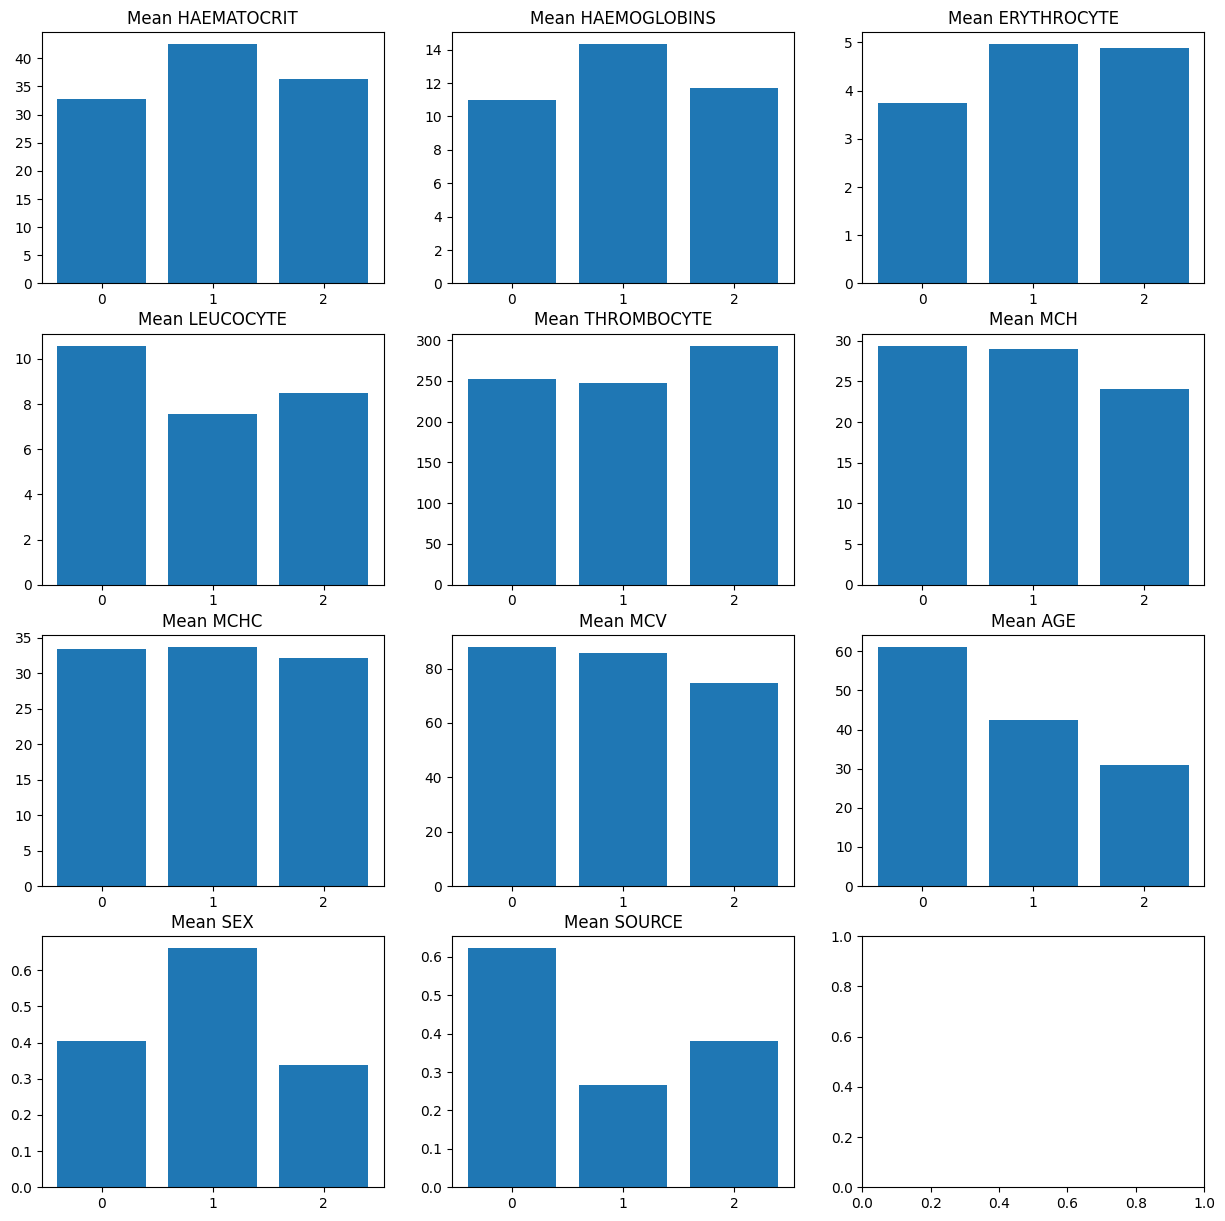

In [ ]:
# Visualize means 
fig, axes = plt.subplots(4,3, figsize = (15, 15))
# fig is an array of dimensions 4,3
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups3.columns[1:]):
  axes[i].bar(cluster_groups3['cluster'], cluster_groups3[col])
  axes[i].set_title(f'Mean {col}')
  axes[i].set_xticks([0,1,2])

Clúster 0: es el que tiene el promedio de edades mayor, tienen eritrocitos, hemoglobina y hematocrito más bajos de los 3 clúster, leucocitos más altos de los 3 clúster y en promedio, son el grupo que más salidas positivas tiene.

Clúster 1: tiene la edad media intermedia entre cluster 0 y 2, tiene los valores de eritrocitos, hematocrito y hemoglobina más altos, los leucoicots más bajos en recuentos junto con las plaquetas y el porcentaje promedio de hombres más altos. Clúster 1 es que el menos salidas positivas tiene.

Clúster 2: tiene la edad media más baja de los 3, procentaje de hombres más bajos, salida de hospitalización intermedia y como característica general posee el más alto recuento de plaquetas. 

# **OVERSAMPLING**

In [ ]:
# Creo una copia del dataset para poder trabajar la limpieza y preprocesamiento en ella
df3 = df.copy()
df3.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,0


In [ ]:
# Convertir los nombres de cadenas de las clases para valores numéricos.
df3['SOURCE'] = df3['SOURCE'].replace({'out': 0, 'in': 1})

In [ ]:
# Ordeno los datos en matriz de características y vector objetivo
# Realizo un train test split. Lo realizo 75 y 25 por defecto, ya que el objetivo está bastante balanceado.
y = df3['SOURCE']
X = df3.drop(columns = 'SOURCE')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Over-sample the minority class using SMOTE
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = over_sample.fit_resample(X_train, y_train)

In [ ]:
# Instanciar selectores de columnas
num_selector = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV']
cat_selector = ['SEX']
ord_selector = ['AGE']

In [ ]:
# Escalo datos numéricos porque todos están en diferentes unidades de medida y hago one hot encoder para la columna sex clasificada como M y F
scaler = StandardScaler() 
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Hago el pipeline
numeric_pipe = make_pipeline(scaler) 
categorical_pipe = make_pipeline(ohe) 
# Realizo tuplas
number_tuple = (numeric_pipe, num_selector) 
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE',
                                  'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC',
                                  'MCV']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['SEX'])])

In [ ]:
# Estimo el parámetro
preprocessor.fit(X_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE',
                                  'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC',
                                  'MCV']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['SEX'])])

In [ ]:
# Transformo 
X_train_processed = preprocessor.transform(X_train_resampled)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Visualizo las columnas
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.columns=preprocessor.get_feature_names_out()
X_train_df.head()

,pipeline-1__HAEMATOCRIT,pipeline-1__HAEMOGLOBINS,pipeline-1__ERYTHROCYTE,pipeline-1__LEUCOCYTE,pipeline-1__THROMBOCYTE,pipeline-1__MCH,pipeline-1__MCHC,pipeline-1__MCV,pipeline-2__SEX_F,pipeline-2__SEX_M,remainder__AGE
0,0.145909,0.024085,-0.048165,-0.877400,-0.536767,0.047129,-0.514609,0.313601,1.0,0.0,32.0
1,-2.244357,-2.024797,-2.055365,0.246284,-0.476028,0.306313,0.850069,-0.047622,1.0,0.0,62.0
2,0.195706,-0.214157,0.040762,-0.121819,-0.016151,-0.508267,-1.718736,0.212458,1.0,0.0,60.0
3,-0.850035,-0.928884,-1.051765,-0.257436,0.547850,0.306313,-0.594884,0.645926,1.0,0.0,29.0
4,0.726877,0.881756,0.320245,-0.664287,0.114004,0.824683,0.769794,0.617029,0.0,1.0,61.0


# *Decision tree*

In [ ]:
decision_tree_5 = DecisionTreeClassifier(max_depth = 5, random_state = 42)
decision_tree_5.fit(X_train_processed, y_train_resampled)
train_5_score = decision_tree_5.score(X_train_processed, y_train_resampled)
test_5_score = decision_tree_5.score(X_test_processed, y_test)
print('train_5_score', train_5_score)
print('test_5_score', test_5_score)

train_5_score 0.7523786869647955
test_5_score 0.7293318233295584


In [ ]:
train_predsdt = decision_tree_5.predict(X_train_processed)
test_predsdt = decision_tree_5.predict(X_test_processed)
# Metricas del modelo con hiperparametros mejorados
print(classification_report(y_test, test_predsdt))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       526
           1       0.66      0.69      0.67       357

    accuracy                           0.73       883
   macro avg       0.72      0.72      0.72       883
weighted avg       0.73      0.73      0.73       883



# *RANDOM FOREST*

In [ ]:
randomforest_22 = RandomForestClassifier(max_depth = 22, n_estimators = 130, random_state=42)
randomforest_22.fit(X_train_processed, y_train_resampled)
randomforest_22_train_score = randomforest_22.score(X_train_processed, y_train_resampled)
randomforest_22_test_score = randomforest_22.score(X_test_processed, y_test)
print(randomforest_22_train_score)
print(randomforest_22_test_score)


1.0
0.753114382785957


In [ ]:
rf_grid_search_predstr = randomforest_22.predict(X_train_processed)
rf_grid_search_predstt = randomforest_22.predict(X_test_processed)
print(classification_report(y_test, rf_grid_search_predstt))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       526
           1       0.71      0.66      0.68       357

    accuracy                           0.75       883
   macro avg       0.74      0.74      0.74       883
weighted avg       0.75      0.75      0.75       883



# *KNN*

In [ ]:
knn1 = KNeighborsClassifier(leaf_size = 10, n_neighbors = 3, p = 1, weights = 'distance')# Hiperparametro buscado con recall
knn1.fit(X_train_processed, y_train_resampled) 
predictions1 = knn1.predict(X_test_processed)
# Metricas del modelo con hiperparametros mejorados
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       526
           1       0.62      0.70      0.66       357

    accuracy                           0.70       883
   macro avg       0.70      0.70      0.70       883
weighted avg       0.71      0.70      0.71       883



In [ ]:
knn2 = KNeighborsClassifier(leaf_size = 10, n_neighbors = 11, p = 3, weights = 'distance')# Hiperparametro buscado con accuracy
knn2.fit(X_train_processed, y_train_resampled) 
predictions2 = knn2.predict(X_test_processed)
# Metricas del modelo con hiperparametros mejorados
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       526
           1       0.65      0.72      0.68       357

    accuracy                           0.73       883
   macro avg       0.72      0.73      0.72       883
weighted avg       0.73      0.73      0.73       883



# *XGBOOST*

In [ ]:
xgb2 = XGBClassifier(max_depth = 4, n_estimators = 280, random_state=42)
xgb2.fit(X_train_processed, y_train_resampled)
xgb2_train_score = xgb2.score(X_train_processed, y_train_resampled)
xgb2_test_score = xgb2.score(X_test_processed, y_test)
print(xgb2_train_score)
print(xgb2_test_score)

0.9854900095147479
0.7168742921857305


In [ ]:
xgb_grid_search_predstr = xgb2.predict(X_train_processed)
xgb_grid_search_predstt = xgb2.predict(X_test_processed)
print(classification_report(y_test, xgb_grid_search_predstt))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       526
           1       0.65      0.65      0.65       357

    accuracy                           0.72       883
   macro avg       0.71      0.71      0.71       883
weighted avg       0.72      0.72      0.72       883



# *LIGHTBOOST*

In [ ]:
lgbm2 = LGBMClassifier(max_depth = 4, n_estimators = 40, random_state=42)
lgbm2.fit(X_train_processed, y_train_resampled)
lgbm2_train_score = lgbm2.score(X_train_processed, y_train_resampled)
lgbm2_test_score = lgbm2.score(X_test_processed, y_test)
print(lgbm2_train_score)
print(lgbm2_test_score)

0.7697431018078021
0.7463193657984145


In [ ]:
# Metricas del modelo por defecto para test
lgbm_grid_search_predstr = lgbm2.predict(X_train_processed)
lgbm_grid_search_predstt = lgbm2.predict(X_test_processed)
print(classification_report(y_test, lgbm_grid_search_predstt))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       526
           1       0.68      0.69      0.69       357

    accuracy                           0.75       883
   macro avg       0.74      0.74      0.74       883
weighted avg       0.75      0.75      0.75       883



# CONCLUSIONES

Para este dataset decidiría implementar el modelo XGBoost con la búsqueda de la mejor métrica Recall. Esto, debido a que los hiperparámetros no tardan tanto en cargar, y el número de falsos negativos son los menores para el modelo. En este caso, un falso negativo corresponde a un paciente que no será tratado como hospitalizado, lo que es un gran riesgo para su salud.

El accuracy del modelo no logra subir del 76%, independiente del hiperparámetro que sea utilizado, por lo que cabe destacar que al dataset, independiente se le agregue una nueva columna no mejora, por lo que se podría inferir que pueden haber problemas en la clasificación ya que se sugiere que es manual, lo que podría haberse generado algún error en la clasificación.

El dataset lamentablemente no posee una columna de seguimiento o de reingreso de los pacientes al servicio, por lo que se desconoce si la clasificación fue realizada correctamente, lo que puede estar sesgando la información si hubo algún error.

Sugiero agregar una columna de seguimiento y de sintomatología, para poder observar si es que la patología o la visita al servicio se refleja en los parámetros del hemograma o simplemente el hemograma no lo predice.